# Optimizing Revenue Leakage & Profitability in the Hospitality Sector
 ### VISUALIZATION NOTEBOOK

# Importing Libraries and Necessary Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hotel=pd.read_csv('dim_hotels.csv')
date=pd.read_csv('dim_date.csv')
room=pd.read_csv('dim_rooms.csv')
agg_booking=pd.read_csv('fact_aggregated_bookings.csv')
booking=pd.read_csv('fact_bookings.csv')

# Checking Datasets

In [90]:
hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [91]:
hotel.shape

(25, 4)

In [92]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [93]:
date.shape

(92, 4)

In [94]:
room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [95]:
room.shape

(4, 2)

In [96]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [97]:
agg_booking.shape

(9200, 5)

In [98]:
agg_booking.dtypes

property_id             int64
check_in_date          object
room_category          object
successful_bookings     int64
capacity                int64
dtype: object

In [99]:
booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [100]:
booking.shape

(134590, 12)

# Data Preprocessing

In [101]:
agg_booking['check_in_date']=pd.to_datetime(agg_booking['check_in_date'])

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/152155301.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_booking['check_in_date']=pd.to_datetime(agg_booking['check_in_date'])


#### Renaming Room Category from Code to Name

In [103]:
agg_booking['room_category']=agg_booking['room_category'].map({'RT1':'Standard','RT2':'Elite','RT3':'Premium','RT4':'Presidential'})

In [104]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,Standard,25,30
1,19562,2022-05-01,Standard,28,30
2,19563,2022-05-01,Standard,23,30
3,17558,2022-05-01,Standard,13,19
4,16558,2022-05-01,Standard,18,19


####  Creating New Column for Percentage Occupancy

In [107]:
agg_booking['percent_occ']=np.round((agg_booking['successful_bookings']/agg_booking['capacity'])*100,2)
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occ
0,16559,2022-05-01,Standard,25,30,83.33
1,19562,2022-05-01,Standard,28,30,93.33
2,19563,2022-05-01,Standard,23,30,76.67
3,17558,2022-05-01,Standard,13,19,68.42
4,16558,2022-05-01,Standard,18,19,94.74


In [108]:
booking.sample(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
132194,Jul302218560RT112,18560,2022-07-28,2022-07-30,2022-07-31,1,RT1,makeyourtrip,NaN,Cancelled,6500,2600
127509,Jul262218563RT19,18563,2022-07-25,2022-07-26,2022-07-27,4,RT1,makeyourtrip,2.0,Checked Out,7800,7800
54864,Jun072217560RT115,17560,2022-05-31,2022-06-07,2022-06-08,1,RT1,others,3.0,Checked Out,11050,11050
72374,Jun182218563RT11,18563,2022-06-18,2022-06-18,2022-06-19,1,RT1,others,NaN,Checked Out,6500,6500
16446,May112218558RT214,18558,2022-05-07,2022-05-11,2022-05-12,4,RT2,direct offline,NaN,Checked Out,10800,10800


In [111]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [114]:
date['date']=pd.to_datetime(date['date'])

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/2795298810.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date['date']=pd.to_datetime(date['date'])


In [124]:
date_list =['booking_date',	'check_in_date'	,'checkout_date']
for item in date_list:
    booking[item]=pd.to_datetime(booking[item])
    print(booking[item].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [128]:
df1= booking.merge(date[['date', 'week no', 'day_type']], left_on='check_in_date', right_on='date',how='left')
df1.drop('date', axis=1, inplace=True)
df1

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,W 32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,W 32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,W 32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,W 32,weekend


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  week no            134590 non-null  object        
 13  day_type           134590 non-null  object  

In [130]:
df = df1.merge(hotel[['property_id', 'property_name','category', 'city']], left_on="property_id", right_on='property_id',how='left')
df.sample(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
82205,Jun262216560RT37,16560,2022-06-25,2022-06-26,2022-06-28,1,RT3,others,3.0,Checked Out,16800,16800,W 27,weekend,Atliq City,Business,Delhi
6162,May042217564RT48,17564,2022-05-04,2022-05-04,2022-05-07,1,RT4,direct online,2.0,Checked Out,32300,32300,W 19,weekeday,Atliq Seasons,Business,Mumbai
47636,Jun022218559RT112,18559,2022-05-31,2022-06-02,2022-06-07,1,RT1,others,3.0,Checked Out,6500,6500,W 23,weekeday,Atliq Exotica,Luxury,Hyderabad
20960,May142218559RT114,18559,2022-05-10,2022-05-14,2022-05-15,2,RT1,makeyourtrip,NaN,Checked Out,6500,6500,W 20,weekend,Atliq Exotica,Luxury,Hyderabad
90344,Jul012218560RT116,18560,2022-07-01,2022-07-01,2022-07-03,3,RT1,journey,5.0,Checked Out,7150,7150,W 27,weekeday,Atliq City,Business,Hyderabad


In [131]:
df['room_category']=df['room_category'].map({'RT1':'Standard','RT2':'Elite','RT3':'Premium','RT4':'Presidential'})
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1.0,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5.0,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5.0,Checked Out,10920,10920,W 19,weekend,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,Presidential,makeyourtrip,2.0,Checked Out,32300,32300,W 32,weekend,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,Presidential,logtrip,2.0,Checked Out,38760,38760,W 32,weekend,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,Presidential,tripster,NaN,Cancelled,32300,12920,W 32,weekend,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,Presidential,logtrip,2.0,Checked Out,32300,32300,W 32,weekend,Atliq Seasons,Business,Mumbai


In [132]:
df['week no']=df['week no'].str.split(" ").str[1]
df['week no']=df['week no'].astype(int)

In [133]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1.0,Checked Out,10010,10010,19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5.0,Checked Out,9100,9100,19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5.0,Checked Out,10920,10920,19,weekend,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,Presidential,makeyourtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,Presidential,logtrip,2.0,Checked Out,38760,38760,32,weekend,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,Presidential,tripster,NaN,Cancelled,32300,12920,32,weekend,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,Presidential,logtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai


#### Revenue Leakage

In [134]:
df['revenue_lkg'] = df['revenue_generated'] - df['revenue_realized']

#### Leakage Percentage

In [136]:
df['lkg_percent'] = (df['revenue_lkg'] / df['revenue_generated']) * 100

In [137]:
df.duplicated().sum()

0

In [138]:
df.reset_index(drop=True, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  week no            134590 non-null  int64         
 13  day_type           134590 non-null  object  

# KPI Metrics Calculation:RevPAR & ADR

  - **RevPAR** : revenue_realized / capacity
  - **ADR** : revenue_realized / successful_bookings

In [141]:
KPI = df.groupby(["property_id",'check_in_date','room_category'])['revenue_realized'].sum().reset_index()
KPI

,property_id,check_in_date,room_category,revenue_realized
0,16558,2022-05-01,Elite,232596
1,16558,2022-05-01,Premium,141120
2,16558,2022-05-01,Presidential,47880
3,16558,2022-05-01,Standard,147420
4,16558,2022-05-02,Elite,141624
...,...,...,...,...
9195,19563,2022-07-30,Standard,138450
9196,19563,2022-07-31,Elite,307800
9197,19563,2022-07-31,Premium,308880
9198,19563,2022-07-31,Presidential,88350


In [143]:
KPI = agg_booking.merge(KPI, on=["property_id",'check_in_date','room_category'], how='left')
KPI['RevPAR'] = KPI['revenue_realized'] / KPI['capacity']
KPI['RevPAR'] = KPI['RevPAR'].round(2)

In [144]:
KPI['ADR'] = KPI['revenue_realized'] / KPI['successful_bookings']
KPI['ADR'] = KPI['ADR'].round(2)

In [145]:
KPI = KPI.merge(df[['check_in_date', 'week no', 'day_type']].drop_duplicates(), on='check_in_date', how='left')
KPI = KPI.merge(df[["property_id",'property_name']].drop_duplicates(), on='property_id', how='left')
KPI

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occ,revenue_realized,RevPAR,ADR,week no,day_type,property_name
0,16559,2022-05-01,Standard,25,30,83.33,235586,7852.87,9423.44,19,weekend,Atliq Exotica
1,19562,2022-05-01,Standard,28,30,93.33,241410,8047.00,8621.79,19,weekend,Atliq Bay
2,19563,2022-05-01,Standard,23,30,76.67,195000,6500.00,8478.26,19,weekend,Atliq Palace
3,17558,2022-05-01,Standard,13,19,68.42,108290,5699.47,8330.00,19,weekend,Atliq Grands
4,16558,2022-05-01,Standard,18,19,94.74,147420,7758.95,8190.00,19,weekend,Atliq Grands
...,...,...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,Presidential,13,18,72.22,292600,16255.56,22507.69,32,weekend,Atliq Palace
9196,16559,2022-07-31,Presidential,13,18,72.22,394060,21892.22,30312.31,32,weekend,Atliq Exotica
9197,17558,2022-07-31,Presidential,3,6,50.00,113050,18841.67,37683.33,32,weekend,Atliq Grands
9198,19563,2022-07-31,Presidential,3,6,50.00,88350,14725.00,29450.00,32,weekend,Atliq Palace


In [146]:
KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   percent_occ          9200 non-null   float64       
 6   revenue_realized     9200 non-null   int64         
 7   RevPAR               9200 non-null   float64       
 8   ADR                  9200 non-null   float64       
 9   week no              9200 non-null   int64         
 10  day_type             9200 non-null   object        
 11  property_name        9200 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 862.6+ KB


#### Exporting DF CSV File

In [150]:
df.to_csv('final_df.csv', index=False)
KPI.to_csv("KPI_df.csv",index=False)

# Data Analysis

## 1. Revenue Distribution Analysis


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  week no            134590 non-null  int64         
 13  day_type           134590 non-null  object  

In [154]:
df[['revenue_generated','revenue_realized','revenue_lkg']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue_generated,134590.0,14916.013188,6452.868072,6500.0,9900.0,13500.0,18000.0,45220.0
revenue_realized,134590.0,12696.123256,6928.108124,2600.0,7600.0,11700.0,15300.0,45220.0
revenue_lkg,134590.0,2219.889932,4314.691090,0.0,0.0,0.0,0.0,27132.0


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/1621660680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revenue_generated'], kde=True, bins=20)


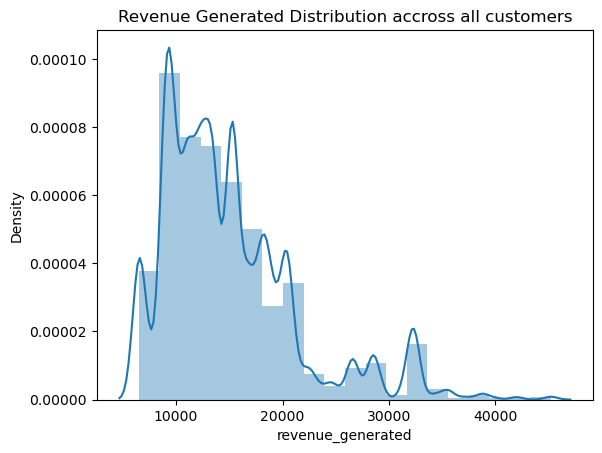

In [155]:
sns.distplot(df['revenue_generated'], kde=True, bins=20)
plt.title('Revenue Generated Distribution accross all customers')
plt.show()

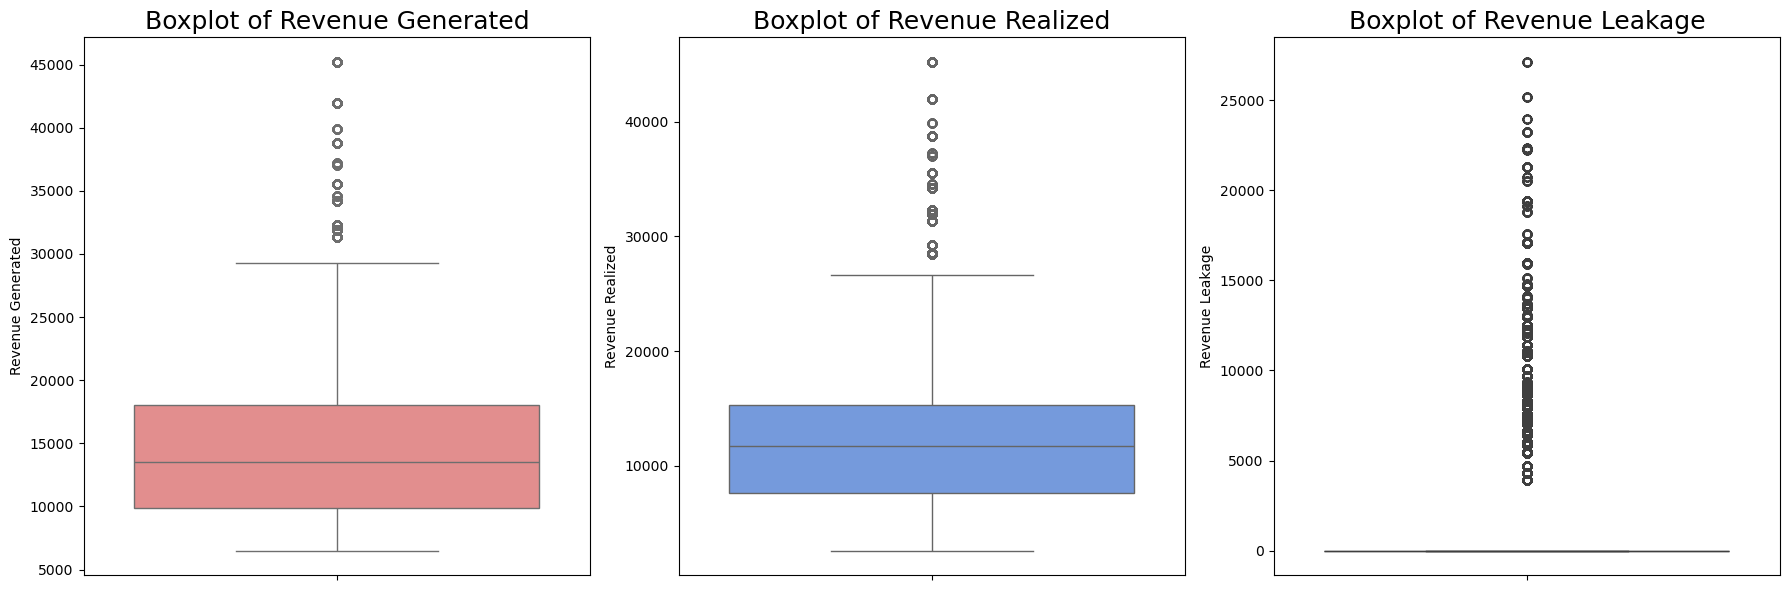

In [160]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(df['revenue_generated'], color = 'lightcoral')
plt.ylabel("Revenue Generated")
plt.title('Boxplot of Revenue Generated', fontsize=18)

plt.subplot(1, 3, 2)
sns.boxplot(df['revenue_realized'], color='cornflowerblue')
plt.ylabel("Revenue Realized")
plt.title('Boxplot of Revenue Realized',fontsize=18)

plt.subplot(1, 3, 3)
sns.boxplot(df['revenue_lkg'])
plt.ylabel("Revenue Leakage")
plt.title('Boxplot of Revenue Leakage',fontsize=18)

plt.tight_layout()
plt.show()

## 2.Booking Trends (Weekday vs Weekend)

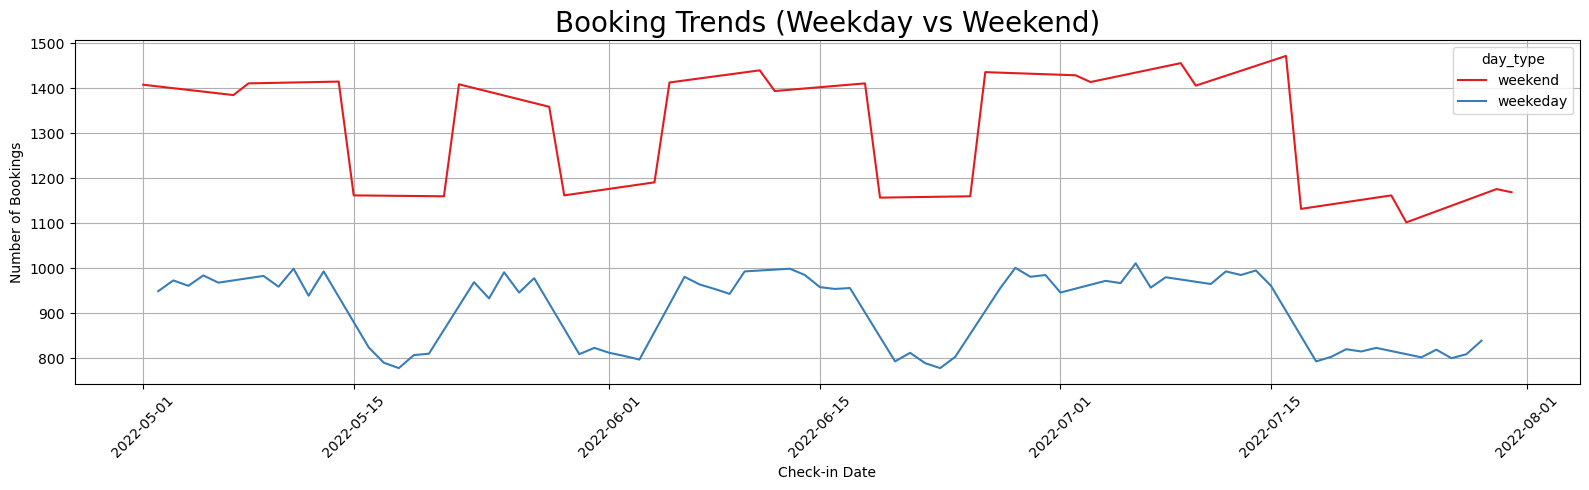

In [165]:
daily_bookings = df[df['booking_status'] == 'Checked Out'].groupby(['check_in_date','day_type']).size().reset_index(name='num_bookings')
plt.figure(figsize=(16, 5))
sns.lineplot(data=daily_bookings, x='check_in_date', y='num_bookings', hue='day_type',palette='Set1')
plt.title('Booking Trends (Weekday vs Weekend)', fontsize=20)
plt.xlabel('Check-in Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

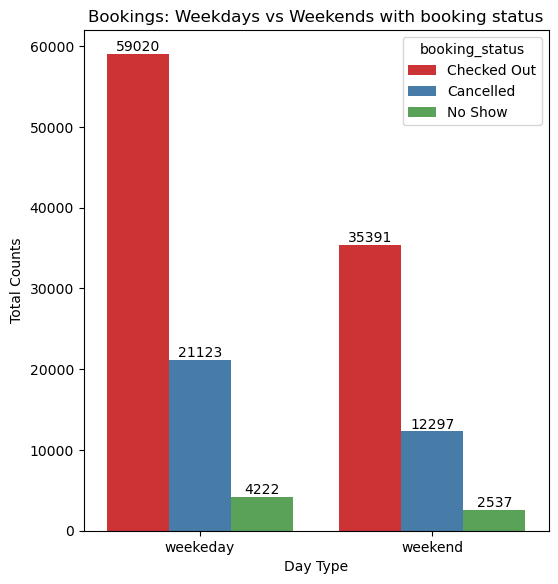

In [172]:
plt.figure(figsize=(6,6.5))
ax = sns.countplot(data=df, x='day_type',order = ['weekeday','weekend'],hue='booking_status', palette='Set1')
for container in ax.containers: 
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.title('Bookings: Weekdays vs Weekends with booking status')
plt.xlabel('Day Type')
plt.ylabel('Total Counts')
plt.show()

## 3. Room Type Trend

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/591930786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df[df['booking_status']=='Checked Out'], x='room_category', palette='Spectral')


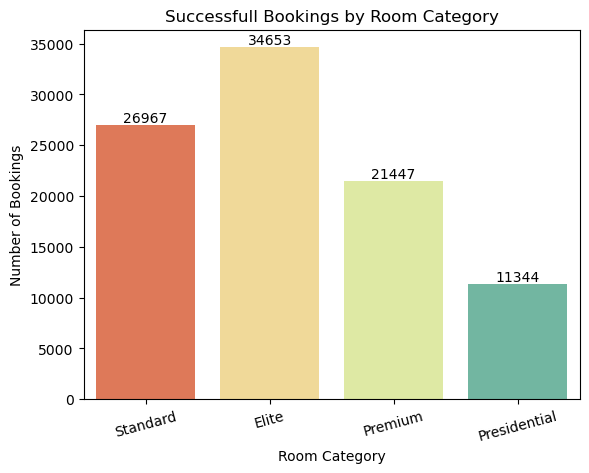

In [174]:
ax = sns.countplot(data=df[df['booking_status']=='Checked Out'], x='room_category', palette='Spectral')

for container in ax.containers: 
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Successfull Bookings by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=15)
plt.show()

## 4.Booking Platform , Room Category , Bookings Comparison

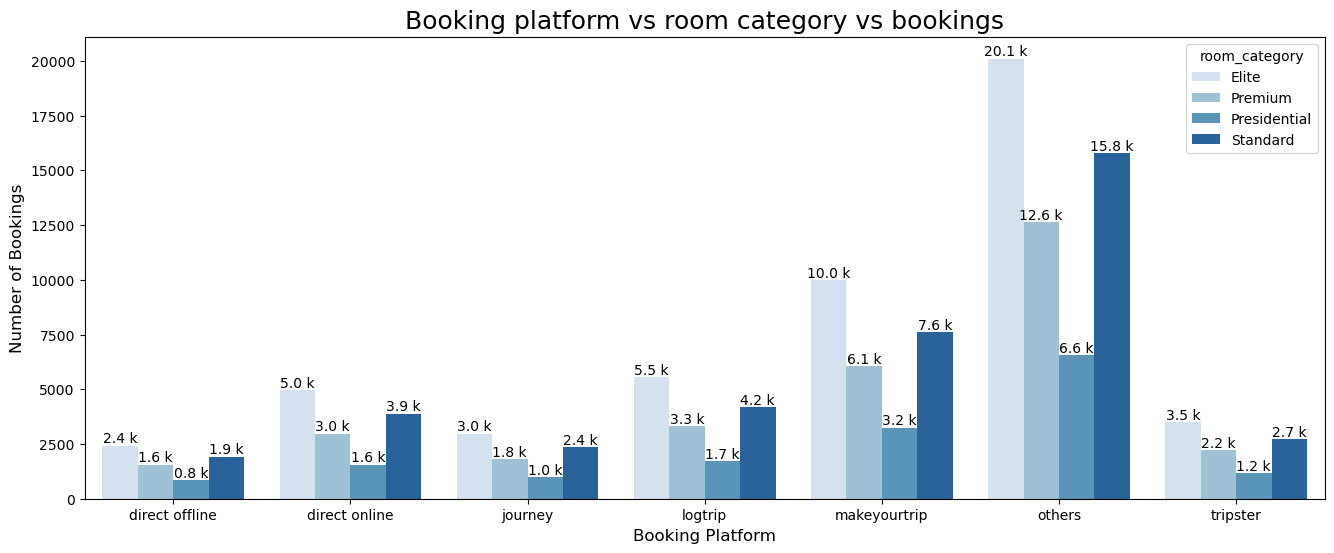

In [180]:
platform_room_cnt = df.groupby(['booking_platform','room_category'])["booking_id"].count().reset_index().rename(columns={"booking_id":"booking_count"})
platform_room_cnt

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=platform_room_cnt, x='booking_platform', y='booking_count', hue='room_category', palette='Blues')

for container in ax.containers:
    labels = [f'{v.get_height()/1000:.1f} k' for v in container]
    ax.bar_label(container,labels=labels, label_type='edge', fontsize=10)

plt.title('Booking platform vs room category vs bookings', fontsize=18)
plt.xlabel('Booking Platform', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()

## 5. Seasonal Occupancy and Revenue Correlation

In [310]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
corr = df[['no_guests', 'revenue_realized','revenue_lkg','week no']]
corr_encod = oe.fit_transform(df[['booking_status','booking_platform','room_category','day_type']])
corr_encod = pd.DataFrame(corr_encod, columns=['booking_status','booking_platform','room_category','day_type'])

corr = pd.concat([corr,corr_encod], axis=1)
corr

,no_guests,revenue_realized,revenue_lkg,week no,booking_status,booking_platform,room_category,day_type
0,3,10010,0,19,1.0,1.0,3.0,1.0
1,2,3640,5460,19,0.0,5.0,3.0,1.0
2,2,9100,0,19,1.0,3.0,3.0,1.0
3,2,3640,5460,19,0.0,5.0,3.0,1.0
4,4,10920,0,19,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
134585,1,32300,0,32,1.0,4.0,2.0,1.0
134586,4,38760,0,32,1.0,3.0,2.0,1.0
134587,1,12920,19380,32,0.0,6.0,2.0,1.0
134588,2,32300,0,32,1.0,3.0,2.0,1.0


<Figure size 900x600 with 0 Axes>

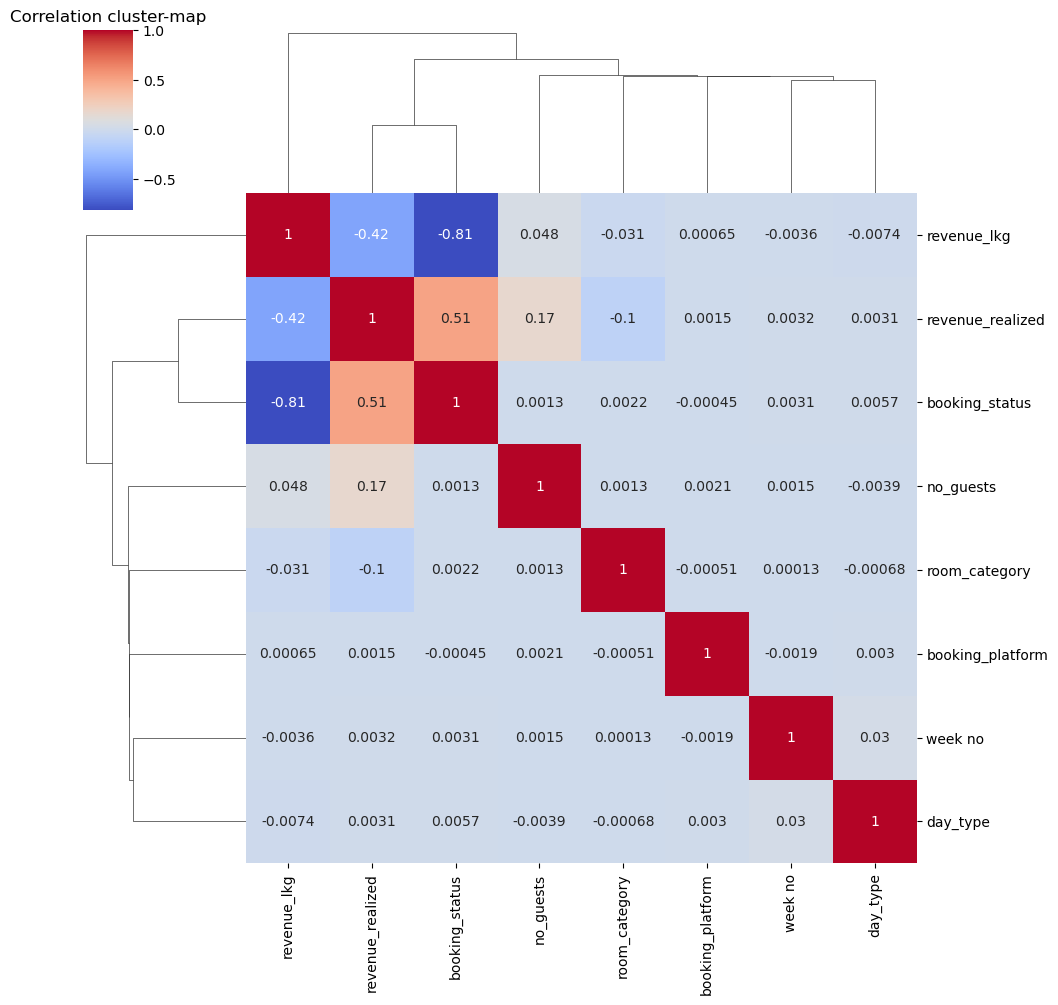

In [186]:
corr_matrix = corr.corr()

plt.figure(figsize=(9, 6) )
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation cluster-map')
plt.xticks(rotation = 0)
plt.show()

In [189]:
guest_occ_rev = df[df['booking_status'] == 'Checked Out'].groupby(['check_in_date', 'day_type']).agg({'no_guests':'sum','revenue_realized':'mean'}).reset_index()
guest_occ_rev

,check_in_date,day_type,no_guests,revenue_realized
0,2022-05-01,weekend,2856,14774.364347
1,2022-05-02,weekeday,1930,14800.584826
2,2022-05-03,weekeday,1978,14907.266187
3,2022-05-04,weekeday,1890,14830.057232
4,2022-05-05,weekeday,2044,14938.460366
...,...,...,...,...
87,2022-07-27,weekeday,1597,14828.406250
88,2022-07-28,weekeday,1627,14844.487021
89,2022-07-29,weekeday,1707,14801.877235
90,2022-07-30,weekend,2370,14857.257653


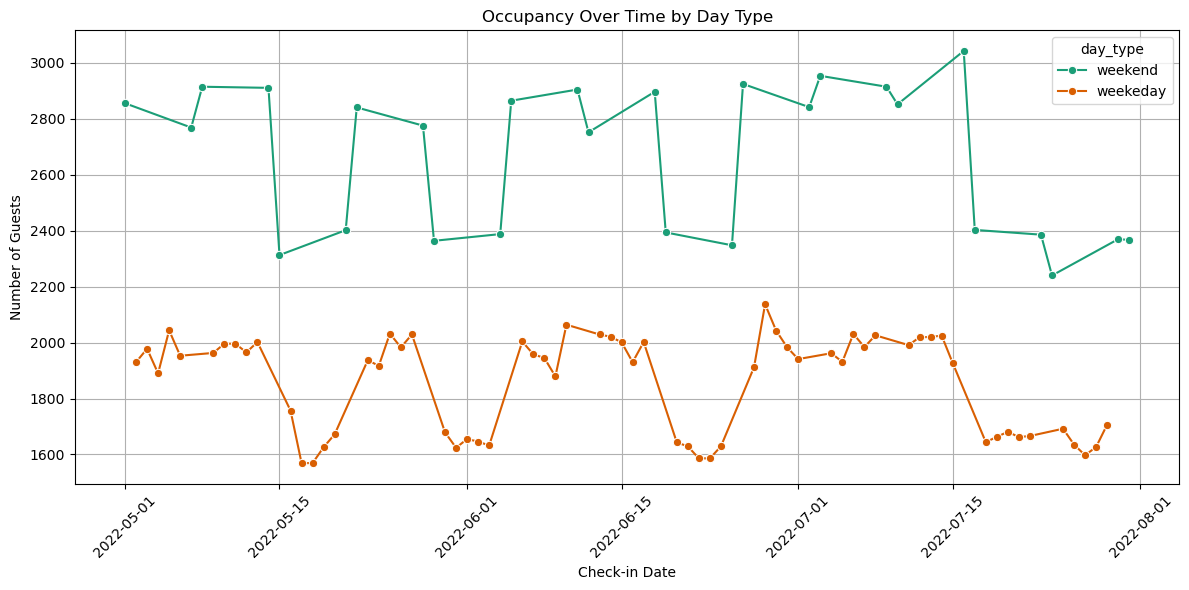

In [195]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=guest_occ_rev, x='check_in_date', y='no_guests', hue='day_type', marker='o', palette='Dark2')
plt.title('Occupancy Over Time by Day Type')
plt.xlabel('Check-in Date')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

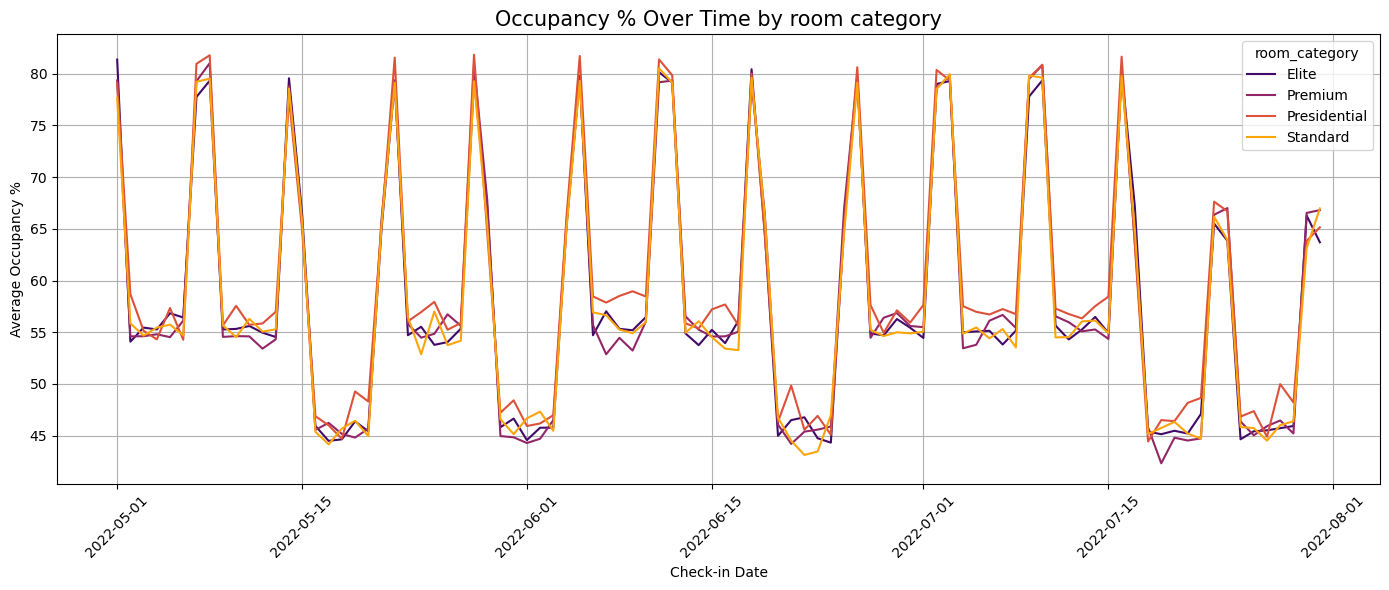

In [200]:
daily_occupancy = agg_booking.groupby(['check_in_date', 'room_category'])['percent_occ'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_occupancy, x='check_in_date', y='percent_occ', hue='room_category', palette='inferno')
plt.title('Occupancy % Over Time by room category', fontsize=15)
plt.xlabel('Check-in Date')
plt.ylabel('Average Occupancy %')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 6. City & Category wise (Revenue Earned)

In [202]:
rev_by_city_cat= df[df['booking_status'] == 'Checked Out'].groupby(['city','category'])['revenue_realized'].sum().reset_index()
rev_by_city_cat

,city,category,revenue_realized
0,Bangalore,Business,123357375
1,Bangalore,Luxury,222419025
2,Delhi,Business,119001820
3,Delhi,Luxury,123876690
4,Hyderabad,Business,87495450
5,Hyderabad,Luxury,181112750
6,Mumbai,Business,211221175
7,Mumbai,Luxury,340629680


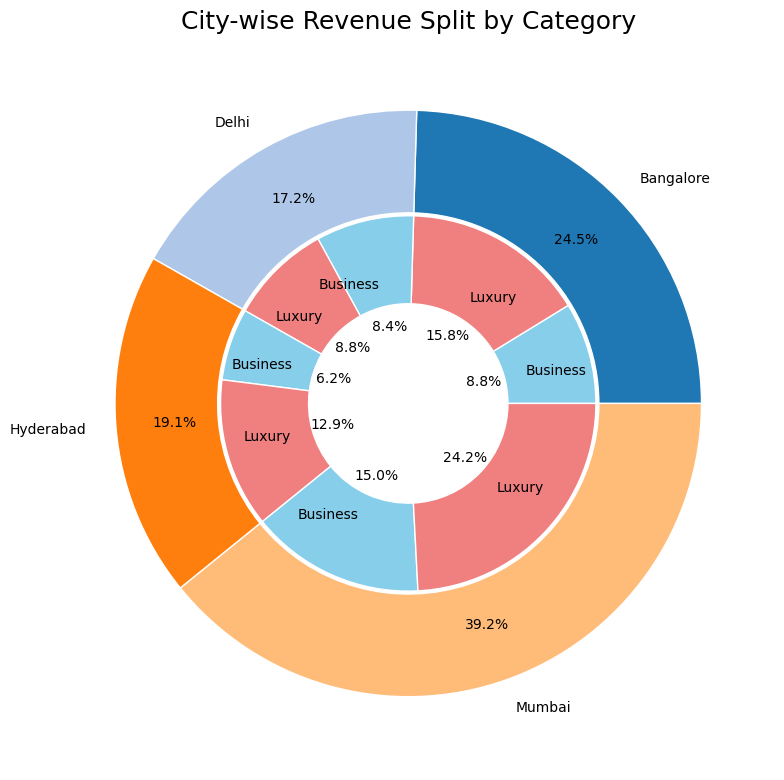

In [311]:
cities = rev_by_city_cat['city'].unique()
city_totals = rev_by_city_cat.groupby('city')['revenue_realized'].sum()

inner_sizes = rev_by_city_cat['revenue_realized']
inner_labels = rev_by_city_cat['category']
inner_colors = ['skyblue','lightcoral'] * (len(cities))  

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(city_totals.values, radius=1,autopct='%2.1f%%',pctdistance=0.8, labels=city_totals.index,colors=sns.color_palette(palette='tab20'), labeldistance=1.1,
       wedgeprops=dict(width=0.35, edgecolor='w'))

ax.pie(inner_sizes, radius=0.64, labels=inner_labels, autopct='%1.1f%%', pctdistance=0.42, colors=inner_colors, labeldistance=0.65,
       wedgeprops=dict(width=0.3, edgecolor='w'))

plt.title('City-wise Revenue Split by Category',fontsize=18)
plt.tight_layout()
plt.show()

## 7. Customer Segmentation (By Spending & Visit Frequency)

In [312]:
customer_seg = df[df['booking_status'] == 'Checked Out'].reset_index().groupby(['booking_platform',"property_name","city"]).agg(
                                                                      {'revenue_realized': 'mean','index': 'count'}).reset_index()

customer_seg = customer_seg.rename(columns={'index': 'total_count'})


customer_seg['spend_type'] = pd.cut(customer_seg['revenue_realized'],bins=[0, customer_seg['revenue_realized'].quantile(0.25),
customer_seg['revenue_realized'].quantile(0.8),customer_seg['revenue_realized'].max()+1],labels=['Low', 'Medium', 'High'])

customer_seg['visit_type'] = pd.cut(customer_seg['total_count'],
                                    bins=[0, 300, customer_seg.total_count.mean() + customer_seg.total_count.std(), customer_seg.total_count.max()+1],
                                    labels=['Rare', 'Occasional', 'Frequent'])
customer_seg['total_revenue'] = customer_seg['revenue_realized'] * customer_seg['total_count']
booking_ids_agg = df[df['booking_status'] == 'Checked Out'].groupby(['booking_platform', "property_name", "city"])['booking_id'].agg(list).reset_index(name='segment_booking_ids')

customer_seg = customer_seg.merge(booking_ids_agg, on=['booking_platform', "property_name", "city"], how='left')
customer_seg.to_csv('customer_segmentation_with_succ_bookings.csv',index = False)
customer_seg

,booking_platform,property_name,city,revenue_realized,total_count,spend_type,visit_type,total_revenue,segment_booking_ids
0,direct offline,Atliq Bay,Bangalore,16529.225352,213,Medium,Rare,3520725.0,"[May012219562RT19, May012219562RT113, May01221..."
1,direct offline,Atliq Bay,Delhi,13541.363636,154,Medium,Rare,2085370.0,"[May012216562RT19, May012216562RT22, May012216..."
2,direct offline,Atliq Bay,Hyderabad,11515.760870,276,Low,Rare,3178350.0,"[May012218562RT25, May012218562RT211, May01221..."
3,direct offline,Atliq Bay,Mumbai,18038.162393,117,High,Rare,2110465.0,"[May012217562RT14, May012217562RT110, May02221..."
4,direct offline,Atliq Blu,Bangalore,14715.000000,225,Medium,Rare,3310875.0,"[May012219561RT22, May012219561RT29, May012219..."
...,...,...,...,...,...,...,...,...,...
163,tripster,Atliq Palace,Bangalore,14619.642857,266,Medium,Rare,3888825.0,"[May012219563RT231, May022219563RT14, May02221..."
164,tripster,Atliq Palace,Delhi,14686.411765,340,Medium,Occasional,4993380.0,"[May012216563RT12, May012216563RT130, May01221..."
165,tripster,Atliq Palace,Hyderabad,11110.425532,235,Low,Rare,2610950.0,"[May012218563RT115, May012218563RT25, May01221..."
166,tripster,Atliq Palace,Mumbai,19247.016129,310,High,Occasional,5966575.0,"[May012217563RT231, May012217563RT39, May01221..."


## 8. Booking Platform vs Spend Type 

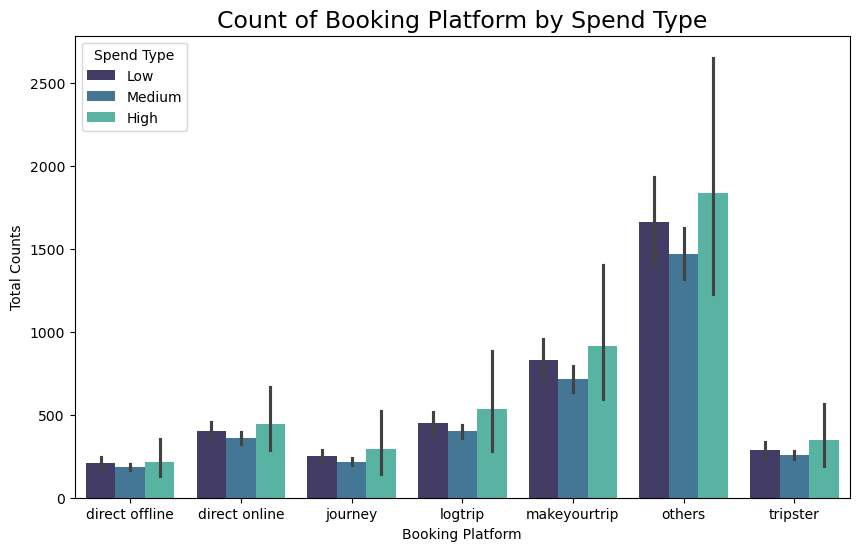

In [207]:
plt.figure(figsize=(10, 6))
sns.barplot(data= customer_seg, x ='booking_platform', y ='total_count',hue = 'spend_type',palette='mako' )

plt.xlabel("Booking Platform")
plt.ylabel("Total Counts")
plt.title("Count of Booking Platform by Spend Type", fontsize=17)
plt.legend(title='Spend Type', loc='upper left')

plt.show()

## 9. Platform wise Revenue Distribution 

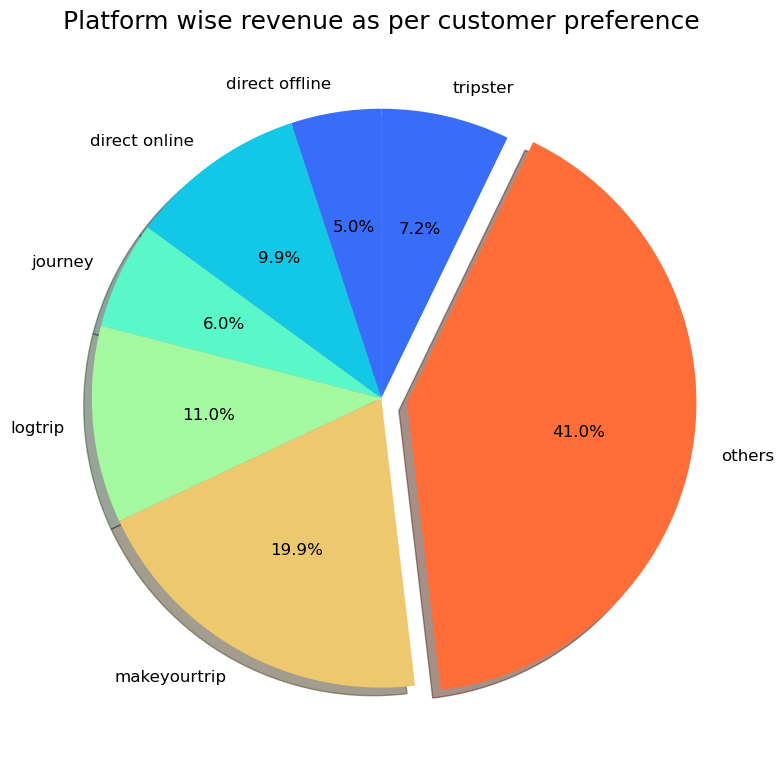

In [313]:
platform_wise_rev = customer_seg.groupby('booking_platform')['total_revenue'].mean()
explode = [0]*len(platform_wise_rev.values)
for i,val in enumerate(platform_wise_rev.values):
  if val == platform_wise_rev.values.max():
    explode[i] = 0.09
    break

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(platform_wise_rev.values, labels=platform_wise_rev.index,
       autopct='%1.1f%%',shadow=True,explode=explode,
       startangle=90,textprops={'fontsize': 12},
       colors=sns.color_palette(palette='rainbow'))

plt.title('Platform wise revenue as per customer preference',fontsize=18)
plt.tight_layout()
plt.show()

## 10. Property Wise Revenue Analysis 

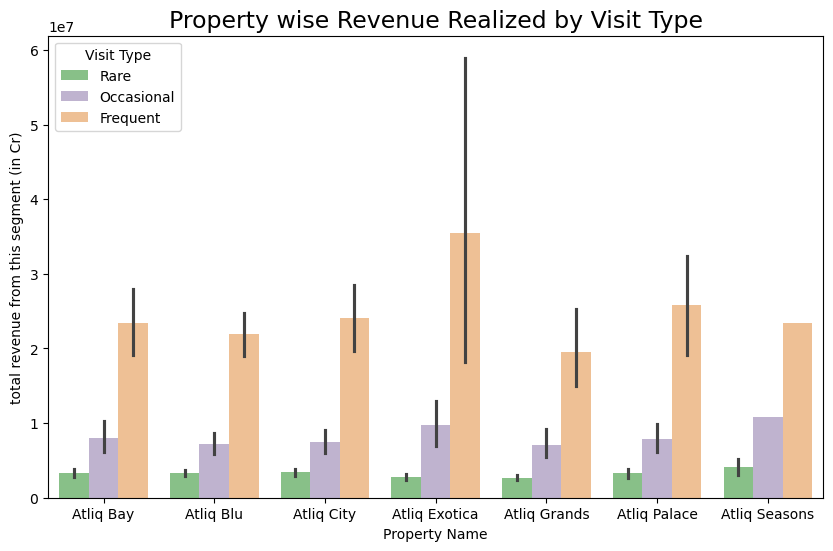

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(data= customer_seg, x ='property_name', y ='total_revenue',hue = 'visit_type',palette='Accent' )

plt.xlabel("Property Name")
plt.ylabel("total revenue from this segment (in Cr)")
plt.title("Property wise Revenue Realized by Visit Type", fontsize=17)
plt.legend(title='Visit Type', loc='upper left')

plt.show()

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/998839548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= customer_seg, x ='property_name', y ='total_revenue', palette = 'spring' )


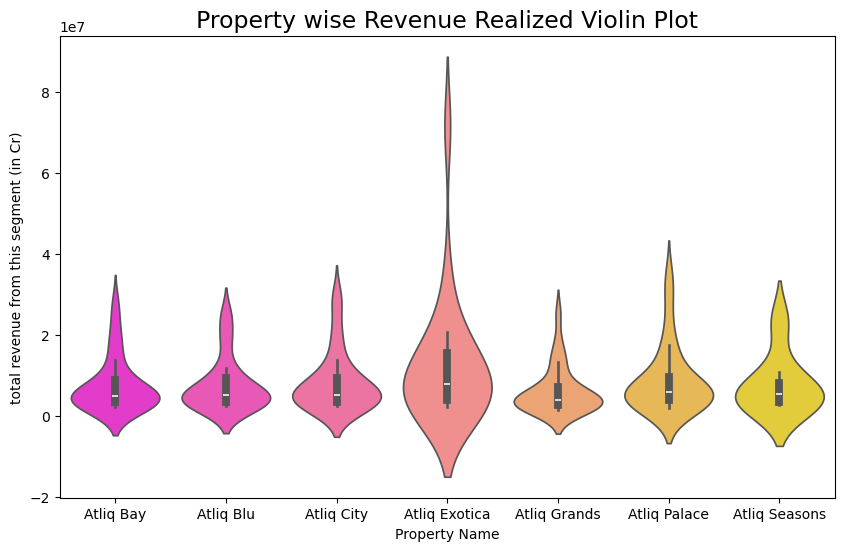

In [315]:
plt.figure(figsize=(10, 6))
sns.violinplot(data= customer_seg, x ='property_name', y ='total_revenue', palette = 'spring' )
plt.xlabel("Property Name")
plt.ylabel("total revenue from this segment (in Cr)")
plt.title("Property wise Revenue Realized Violin Plot", fontsize=17)
plt.show()

## 11. Customer Segmentation (Other Trends)

In [231]:
rev_threshold = customer_seg['revenue_realized'].quantile(0.9)
highest_rev_customers = customer_seg[customer_seg['revenue_realized'] > rev_threshold].drop('total_count', axis=1)
highest_rev_customers = highest_rev_customers.sort_values(by='revenue_realized', ascending=False)
highest_rev_customers

,booking_platform,property_name,city,revenue_realized,spend_type,visit_type,total_revenue,segment_booking_ids
143,others,Atliq Seasons,Mumbai,19865.631891,High,Frequent,23421580.0,"[May012217564RT11, May012217564RT13, May012217..."
71,journey,Atliq Seasons,Mumbai,19745.774194,High,Rare,3060595.0,"[May012217564RT26, May012217564RT213, May01221..."
95,logtrip,Atliq Seasons,Mumbai,19625.620690,High,Rare,5691430.0,"[May012217564RT21, May012217564RT215, May01221..."
47,direct online,Atliq Seasons,Mumbai,19584.184783,High,Rare,5405235.0,"[May012217564RT12, May012217564RT28, May012217..."
22,direct offline,Atliq Palace,Mumbai,19296.180556,High,Rare,4167975.0,"[May012217563RT110, May012217563RT27, May01221..."
166,tripster,Atliq Palace,Mumbai,19247.016129,High,Occasional,5966575.0,"[May012217563RT231, May012217563RT39, May01221..."
167,tripster,Atliq Seasons,Mumbai,19153.609756,High,Rare,3926490.0,"[May012217564RT42, May022217564RT34, May022217..."
23,direct offline,Atliq Seasons,Mumbai,18981.250000,High,Rare,2581450.0,"[May012217564RT216, May012217564RT219, May0222..."
94,logtrip,Atliq Palace,Mumbai,18965.432596,High,Occasional,9425820.0,"[May012217563RT121, May012217563RT212, May0122..."
118,makeyourtrip,Atliq Palace,Mumbai,18946.536797,High,Occasional,17506600.0,"[May012217563RT17, May012217563RT19, May012217..."


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/668138664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=highest_rev_customers['booking_platform'], palette='viridis')


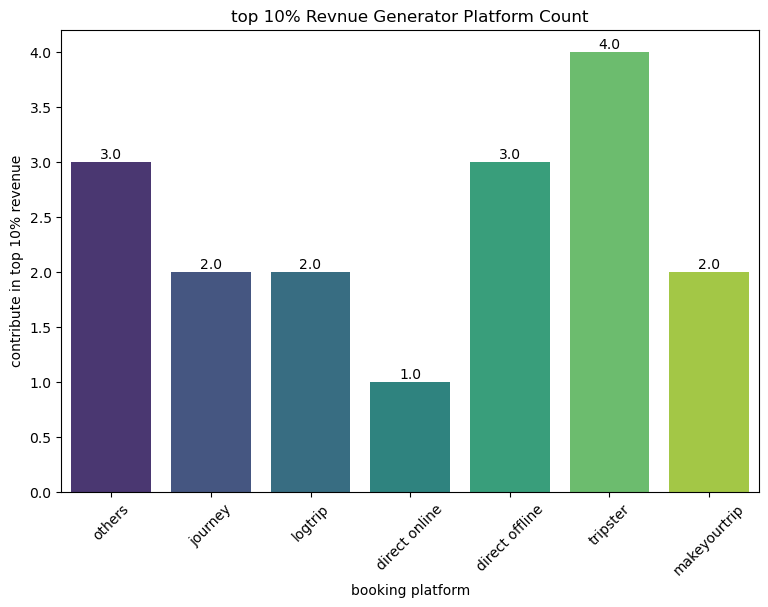

In [316]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x=highest_rev_customers['booking_platform'], palette='viridis')

for container in ax.containers:
  labels = [v.get_height() for v in container]
  ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

plt.xlabel('booking platform')
plt.ylabel('contribute in top 10% revenue')
plt.title('top 10% Revnue Generator Platform Count')
plt.xticks(rotation=45)
plt.show()

## 12. Performance Metrics: Weekday vs Weekend

In [238]:
weekly_data = KPI.groupby("day_type").agg({'revenue_realized':'sum','RevPAR':'mean','ADR':'mean','percent_occ':'mean'}).round(2)
weekly_data

,revenue_realized,RevPAR,ADR,percent_occ
day_type,,,,
weekeday,1069703782,7635.32,14669.01,51.81
weekend,639067447,10908.78,14756.29,73.96


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/274674472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_data.index, y=weekly_data[col], ax=axes[i], palette='rainbow')
/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/274674472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_data.index, y=weekly_data[col], ax=axes[i], palette='rainbow')
/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/274674472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_data.index, y

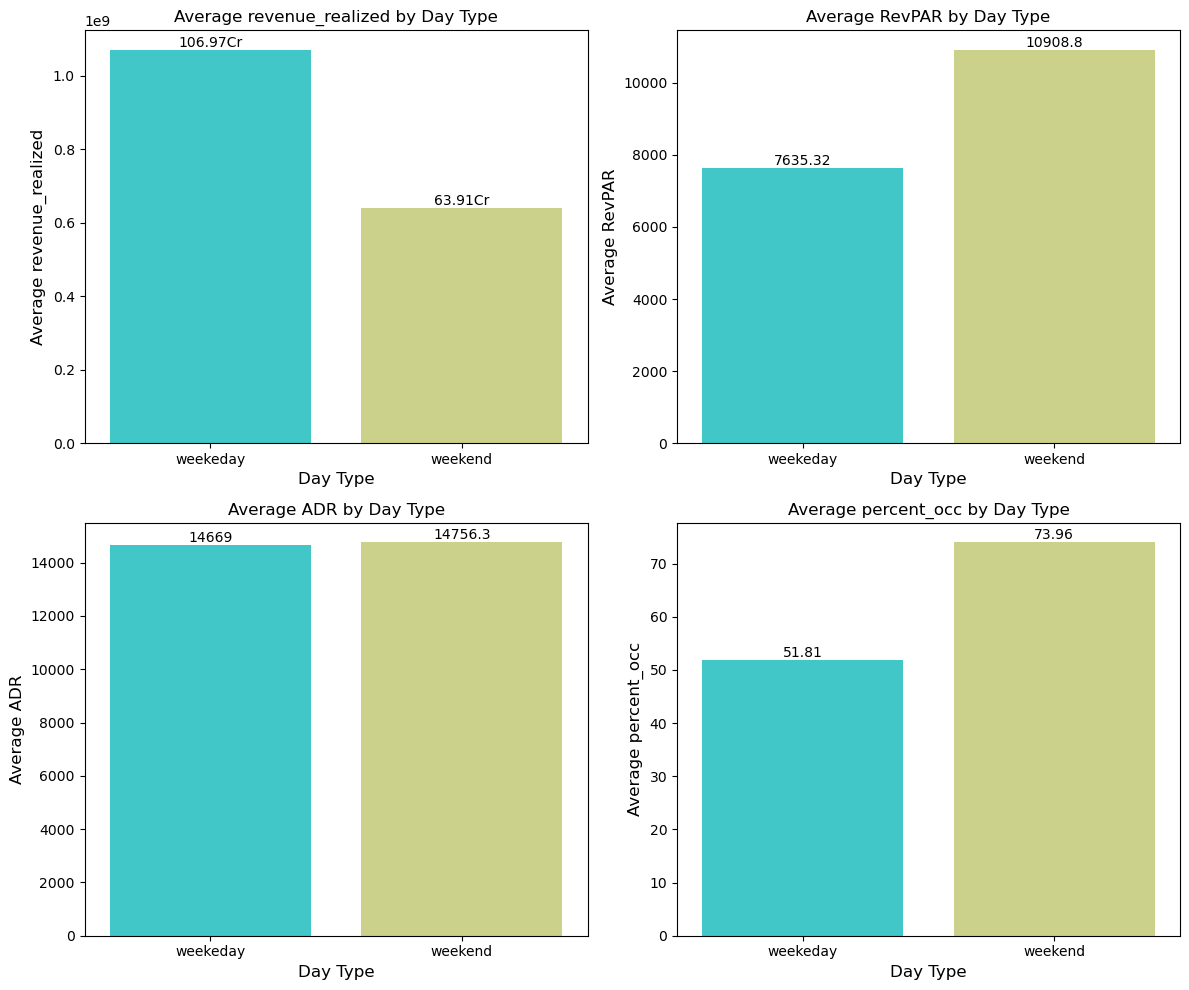

In [317]:
if isinstance(weekly_data, pd.DataFrame):
    columns_to_plot = ['revenue_realized', 'RevPAR', 'ADR', 'percent_occ']

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):

        sns.barplot(x=weekly_data.index, y=weekly_data[col], ax=axes[i], palette='rainbow')
        axes[i].set_title(f'Average {col} by Day Type')
        axes[i].set_xlabel('Day Type',fontsize=12)
        axes[i].set_ylabel(f'Average {col}',fontsize=12)
        axes[i].tick_params(axis='x', rotation=0)

      
        for container in axes[i].containers:
            if i==0:
              labels = [f'{v.get_height()/10000000:.2f}Cr' for v in container]
              axes[i].bar_label(container, labels=labels, label_type='edge', fontsize=10)
            else:
              axes[i].bar_label(container, label_type='edge', fontsize=10)


    plt.tight_layout()
    plt.show()
else:
    print("weekly_data is not a pandas DataFrame.")

# ROOT CAUSE ANALYSIS

## 1. Room Category Performance Analysis (% Occupancy)

In [248]:
grp = agg_booking.groupby(['room_category']).agg({
    'successful_bookings': 'sum',
    'capacity': 'sum'
}).reset_index()

grp['grouped_occ_pct'] = grp['successful_bookings'] / grp['capacity'] * 100

grp.sort_values(by='grouped_occ_pct', ascending=True, inplace=True)

# Display result
grp


,room_category,successful_bookings,capacity,grouped_occ_pct
1,Premium,30566,53084,57.580439
0,Elite,49505,85928,57.612187
3,Standard,38446,66424,57.879682
2,Presidential,16073,27140,59.222550


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/3348817841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grp, x='room_category', y='grouped_occ_pct', palette='mako')


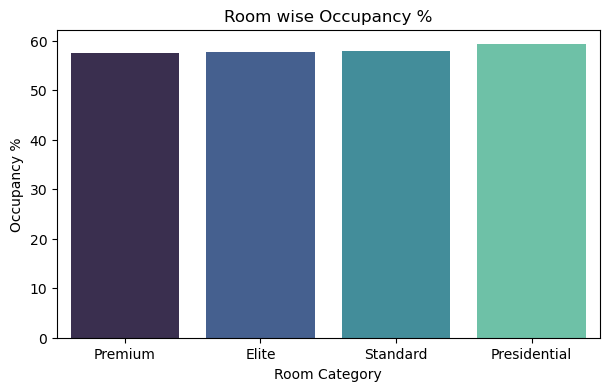

In [249]:
# plot a bar chart of  room wise occupy percentage

plt.figure(figsize=(7,4))

sns.barplot(data=grp, x='room_category', y='grouped_occ_pct', palette='mako')
plt.xlabel('Room Category')
plt.ylabel('Occupancy %')
plt.title('Room wise Occupancy %')
plt.show()


## 2. Room Category Performance: (Total vs Successful Bookings)

In [253]:
room_grp = df[df['booking_status'] == 'Checked Out'].groupby('room_category').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum',
    'revenue_lkg': 'sum',
    'no_guests': 'sum'
}).reset_index().rename(columns={'booking_id': 'successful_bookings'})

room_grp

,room_category,successful_bookings,revenue_realized,revenue_lkg,no_guests
0,Elite,34653,461430180,0,68263
1,Premium,21447,381040680,0,46723
2,Presidential,11344,311567700,0,23886
3,Standard,26967,255075405,0,53577


In [254]:
#  Get Total Bookings (All Statuses)
total_bookings = df.groupby('room_category')['booking_id'].count().reset_index().rename(columns={'booking_id': 'total_bookings'})

#Merge to Compare Performance
room_perf = room_grp.merge(total_bookings, on='room_category', how='left')
room_perf['success_booking_rate'] = (room_perf['successful_bookings'] / room_perf['total_bookings']) * 100

# Avg Revenue per room
room_perf['RevPAR'] = np.round(room_perf['revenue_realized'] / room_perf['successful_bookings'],2)

# Diaplaying the room performence data
room_perf

,room_category,successful_bookings,revenue_realized,revenue_lkg,no_guests,total_bookings,success_booking_rate,RevPAR
0,Elite,34653,461430180,0,68263,49505,69.998990,13315.74
1,Premium,21447,381040680,0,46723,30566,70.166198,17766.62
2,Presidential,11344,311567700,0,23886,16073,70.577988,27465.42
3,Standard,26967,255075405,0,53577,38446,70.142538,9458.80


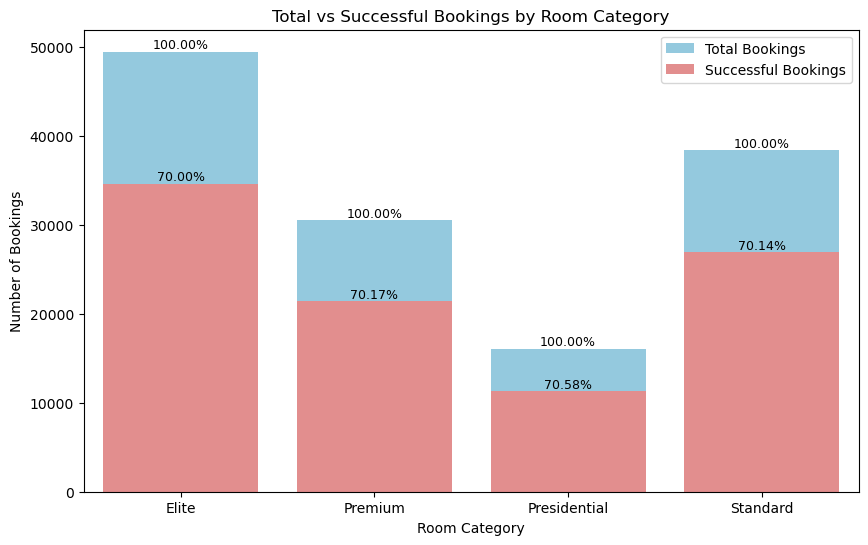

In [265]:
plt.figure(figsize=(10, 6))
bar1 = sns.barplot(x='room_category', y='total_bookings', data=room_perf, color='skyblue', label='Total Bookings')
bar2 = sns.barplot(x='room_category', y='successful_bookings', data=room_perf, color='lightcoral', label='Successful Bookings')
plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.title('Total vs Successful Bookings by Room Category')
plt.legend()

for container in bar2.containers:
  labels = [f'{v.get_height() / total * 100:.2f}%' for v, total in zip(container, room_perf['total_bookings'])]
  bar2.bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.show()


## 3. Room Category Performance: (Total vs RevPAR)

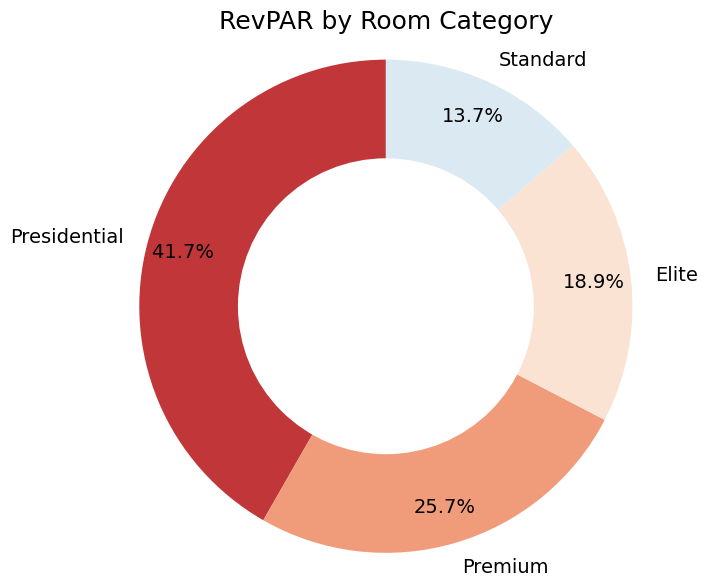

In [264]:
room_wise_RevPAR = KPI.groupby('room_category')['RevPAR'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 7))
plt.pie(room_wise_RevPAR, labels=room_wise_RevPAR.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,textprops={'fontsize': 14},
                                                                                                     colors=sns.color_palette('RdBu'))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('RevPAR by Room Category',fontsize=18)
plt.axis('equal')
plt.show()

## 4.Uncsuccessfull Bookings Over the Time

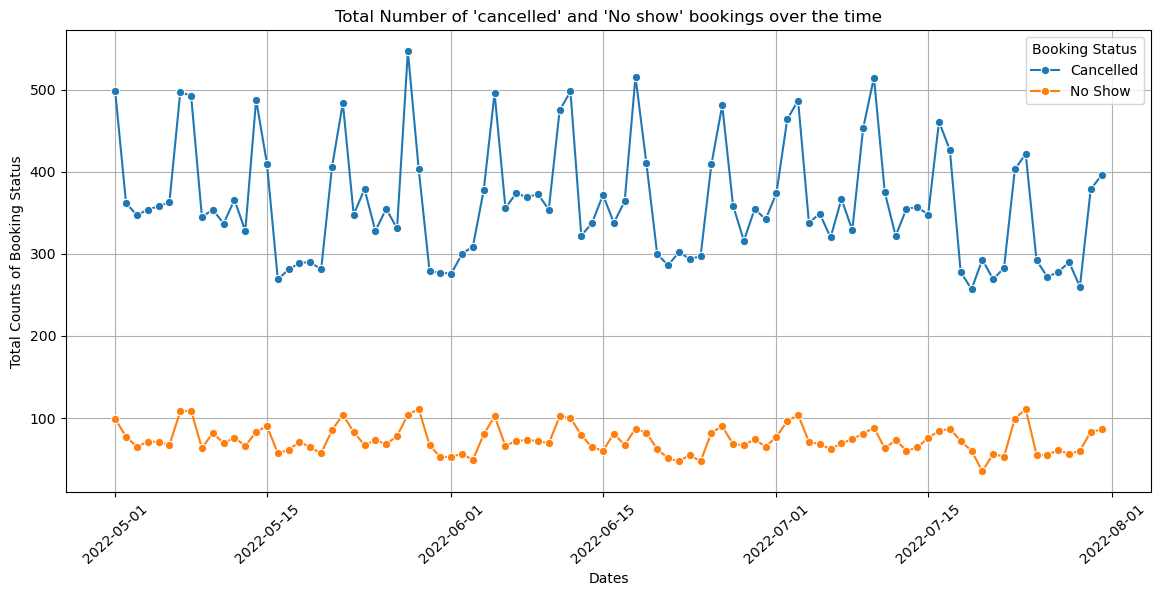

In [268]:
un_succ_data = df[df['booking_status'] != 'Checked Out']
track_booking_stts = un_succ_data.groupby(['check_in_date', 'booking_status'])['booking_id'].count().rename('Total Count').reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=track_booking_stts, x='check_in_date', y='Total Count', hue='booking_status',marker='o')
plt.xlabel("Dates")
plt.ylabel('Total Counts of Booking Status')
plt.title("Total Number of 'cancelled' and 'No show' bookings over the time")
plt.xticks(rotation=42)
plt.grid()
plt.legend(title='Booking Status')
plt.show()

## 5. Revenue Leakage from Cancellations (By Booking Platform)

In [271]:
cancel_data = df[df['booking_status'] == 'Cancelled']
cancel_by_platform = cancel_data.groupby(['booking_platform']).agg({"revenue_lkg":'sum',"booking_id":'count'}).rename(columns={'booking_id': 'counts'})
cancel_by_platform['Avg_Rev_leakage'] = np.round(cancel_by_platform['revenue_lkg'] / cancel_by_platform['counts'],2 )
cancel_by_platform = cancel_by_platform.sort_values(by='Avg_Rev_leakage',ascending=False)
cancel_by_platform  = cancel_by_platform.reset_index()
cancel_by_platform

,booking_platform,revenue_lkg,counts,Avg_Rev_leakage
0,direct offline,14954922,1654,9041.67
1,makeyourtrip,60667626,6722,9025.23
2,journey,18123381,2009,9021.10
3,tripster,21647709,2407,8993.65
4,logtrip,31924467,3586,8902.53
5,direct online,29743563,3344,8894.61
6,others,121713318,13698,8885.48


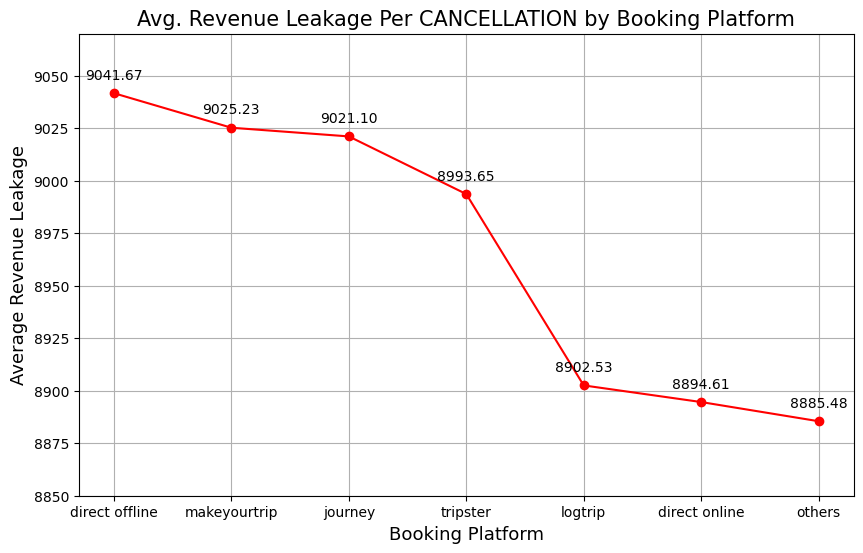

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(cancel_by_platform['booking_platform'], cancel_by_platform['Avg_Rev_leakage'], marker='o',color='r' )

for i, txt in enumerate(cancel_by_platform['Avg_Rev_leakage']):
    plt.annotate(f'{txt:.2f}',
                (cancel_by_platform.index[i], cancel_by_platform['Avg_Rev_leakage'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel("Booking Platform",fontsize=13)
plt.ylabel("Average Revenue Leakage",fontsize=13)
plt.title("Avg. Revenue Leakage Per CANCELLATION by Booking Platform",fontsize=15)

plt.ylim(8850, 9070)
plt.grid()
plt.show()

## 6. Revenue Leakage from Cancellations (By Room Category)

In [280]:
cancel_by_room =  cancel_data.groupby(['room_category','day_type']).agg({"revenue_lkg":'mean',"booking_id":'count'})
cancel_by_room=cancel_by_room .rename(columns={'booking_id': 'counts', 'revenue_lkg':'avg_rev_leak'}).reset_index()
cancel_by_room['avg_rev_leak'] = np.round(cancel_by_room['avg_rev_leak'],2 )
cancel_by_room['pct_rev_leak'] = np.round(cancel_by_room['avg_rev_leak'] / cancel_by_room['avg_rev_leak'].sum() * 100, 2 )
cancel_by_room = cancel_by_room.sort_values(by='avg_rev_leak',ascending=False).reset_index(drop=True)
cancel_by_room


,room_category,day_type,avg_rev_leak,counts,pct_rev_leak
0,Presidential,weekeday,16565.46,2511,20.31
1,Presidential,weekend,16307.95,1417,19.99
2,Premium,weekeday,10725.50,4786,13.15
3,Premium,weekend,10677.28,2819,13.09
4,Elite,weekeday,7986.55,7795,9.79
5,Elite,weekend,7983.30,4562,9.79
6,Standard,weekeday,5667.47,6031,6.95
7,Standard,weekend,5654.12,3499,6.93


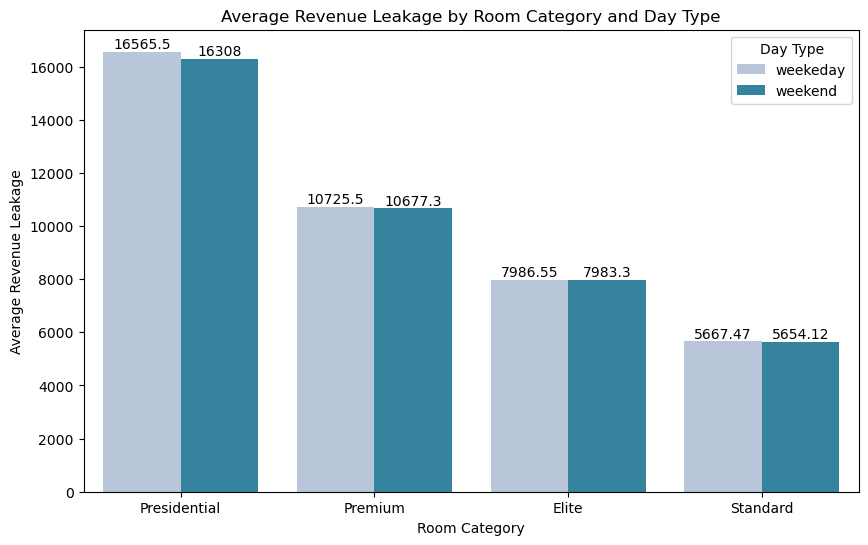

In [281]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cancel_by_room ,x='room_category', y='avg_rev_leak',hue='day_type', palette='PuBuGn')
for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.xlabel('Room Category')
plt.ylabel('Average Revenue Leakage')
plt.title('Average Revenue Leakage by Room Category and Day Type')
plt.legend(title='Day Type')
plt.show()

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/4264305093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cancel_data['room_category'], palette='BuPu',


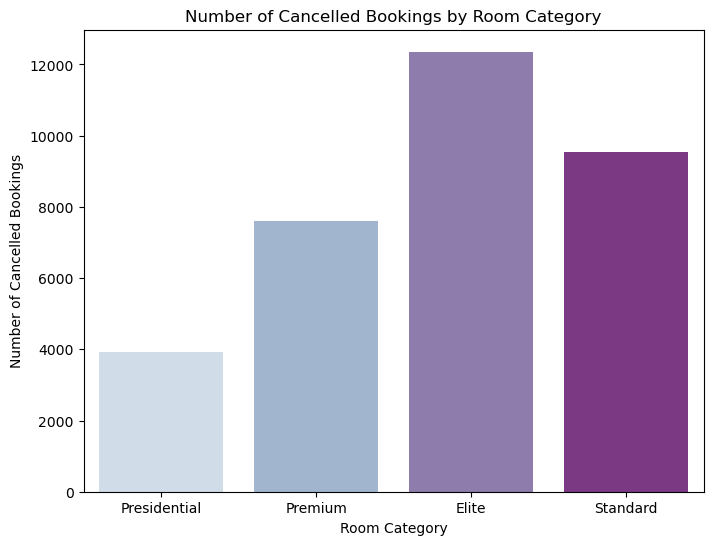

In [282]:
plt.figure(figsize=(8, 6))
sns.countplot(x = cancel_data['room_category'], palette='BuPu',
              order=['Presidential','Premium','Elite','Standard'])

plt.xlabel('Room Category')
plt.ylabel('Number of Cancelled Bookings')
plt.title('Number of Cancelled Bookings by Room Category')
plt.show()

## 7. Impact of Last-Minute Discounts on Revenue Leakage

In [283]:
cancel_data = df[df['booking_status'] == 'Cancelled']
cancel_data['booking_gap'] = (cancel_data['check_in_date'] - cancel_data['booking_date']).dt.days  # gap in days
cancel_data["booking_gap_stts"] = np.where(cancel_data['booking_gap'] <= 2, 'Late', 'Early')

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/2402601974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_data['booking_gap'] = (cancel_data['check_in_date'] - cancel_data['booking_date']).dt.days  # gap in days
/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/2402601974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_data["booking_gap_stts"] = np.where(cancel_data['booking_gap'] <= 2, 'Late', 'Early')


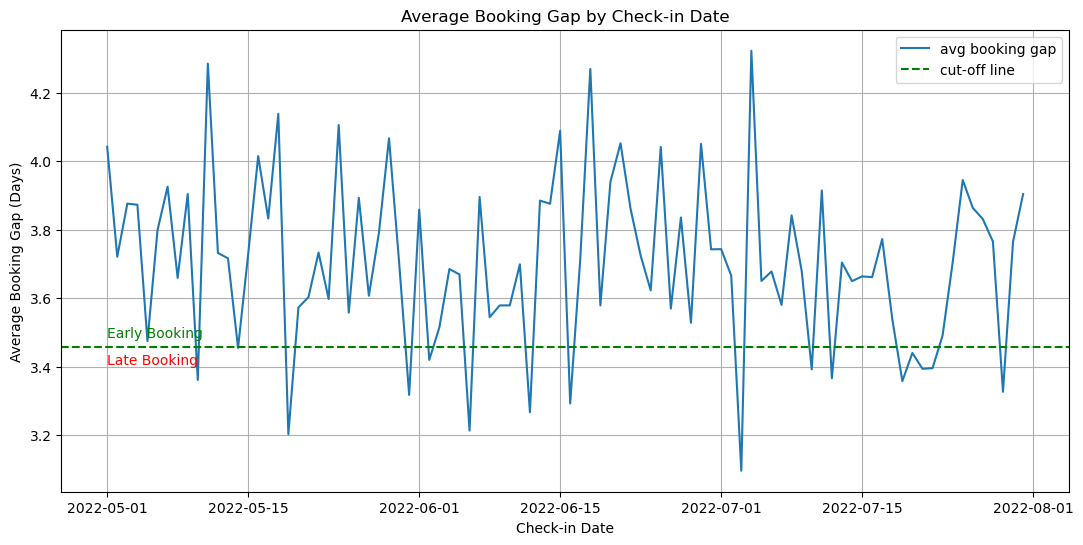

In [285]:
date_wise_gap = cancel_data.groupby('check_in_date')['booking_gap'].mean()

plt.figure(figsize=(13,6))

plt.plot(date_wise_gap.index , date_wise_gap.values, label='avg booking gap')

cutoff = float(np.round(date_wise_gap.mean() - date_wise_gap.std(),3 ))
plt.axhline(y=cutoff, color='g', linestyle='--',label='cut-off line')
plt.text(date_wise_gap.index[0], cutoff + 0.02, 'Early Booking', verticalalignment='bottom', color='green', fontsize=10)
plt.text(date_wise_gap.index[0], cutoff - 0.02, 'Late Booking', verticalalignment='top', color='red', fontsize=10)

plt.xlabel('Check-in Date')
plt.ylabel('Average Booking Gap (Days)')
plt.title('Average Booking Gap by Check-in Date')
plt.legend()
plt.grid()
plt.show()


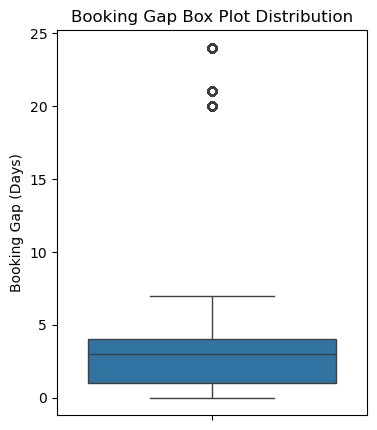

In [286]:
plt.figure(figsize=(4,5))
sns.boxplot(cancel_data['booking_gap'])
plt.ylabel('Booking Gap (Days)')
plt.title('Booking Gap Box Plot Distribution')
plt.show()

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/108615410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=cancel_data['booking_gap_stts'], palette='Greens')


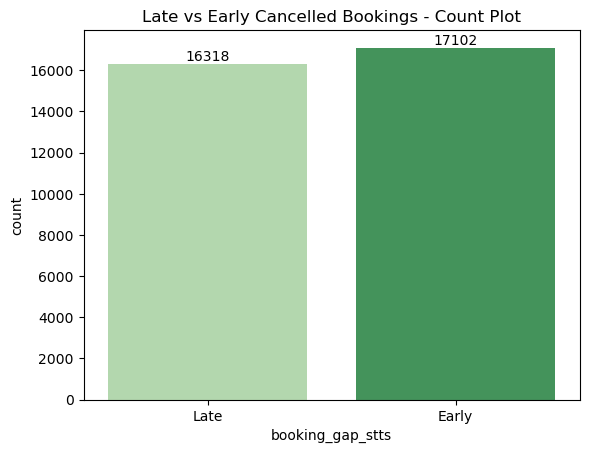

In [291]:
ax=sns.countplot(x=cancel_data['booking_gap_stts'], palette='Greens')
ax.set_title('Late vs Early Cancelled Bookings - Count Plot')
for con in ax.containers:
  ax.bar_label(con, label_type='edge')
plt.show()

## 8. Optimize Revenue Leakage by dealing with Late Bookings and Cancellations

In [295]:
cancel_data["new_rev_leakage"] = np.where(cancel_data['booking_gap_stts'] == 'Late', 0, cancel_data['revenue_lkg'])
cancel_data = cancel_data.reset_index(drop=True)
old_rev_leak = cancel_data['revenue_lkg'].sum()
new_rev_leak = cancel_data['new_rev_leakage'].sum()

reduced_pct = np.round((old_rev_leak - new_rev_leak) / old_rev_leak * 100,2)

print(f"Old Revenue Leakage: ₹{old_rev_leak:,.0f}")
print(f"New Revenue Leakage: ₹{new_rev_leak:,.0f}")
print(f'Revenue Leakage reduced by: {reduced_pct}%')

Old Revenue Leakage: ₹298,774,986
New Revenue Leakage: ₹152,182,680
Revenue Leakage reduced by: 49.06%


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/1079450601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=leakage_values, palette='viridis')


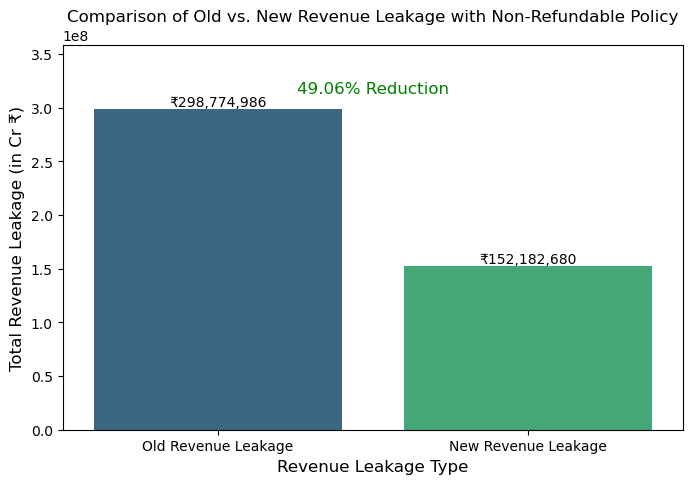

In [296]:
leakage_values = [old_rev_leak, new_rev_leak]
labels = ['Old Revenue Leakage', 'New Revenue Leakage']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=leakage_values, palette='viridis')

# Add percentage reduction text
plt.text(0.5, max(leakage_values) * 1.05, f'{reduced_pct}% Reduction',
         horizontalalignment='center', fontsize=12, color='green')

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='₹{:,.0f}', label_type='edge', fontsize=10)


plt.xlabel('Revenue Leakage Type',fontsize=12 )
plt.ylabel('Total Revenue Leakage (in Cr ₹)',fontsize=12)
plt.title('Comparison of Old vs. New Revenue Leakage with Non-Refundable Policy')
plt.ylim(0, max(leakage_values) * 1.2)
plt.show()

In [297]:
cancel_data.to_csv('Generated_cancelled_data.csv',index=False)

## 9. Assesment of customer Reviews and Trends

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/3648730419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df_rating['ratings_given'], palette="Oranges_d")


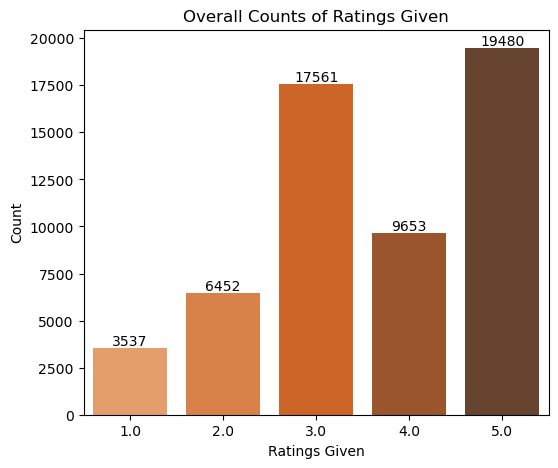

Average ratings are:


3.62

In [299]:
# extracted dataframe with ratings
df_rating = df[df['ratings_given'].notna()]

plt.figure(figsize=(6, 5))

ax=sns.countplot(x=df_rating['ratings_given'], palette="Oranges_d")
for con in ax.containers:
  ax.bar_label(con, label_type='edge')

plt.xlabel('Ratings Given')
plt.ylabel('Count')
plt.title('Overall Counts of Ratings Given')
plt.show()

print("Average ratings are:")
float(np.round(df_rating['ratings_given'].mean(),2 ))

## 10. Customer Satisfaction Analysis (Based on Ratings)


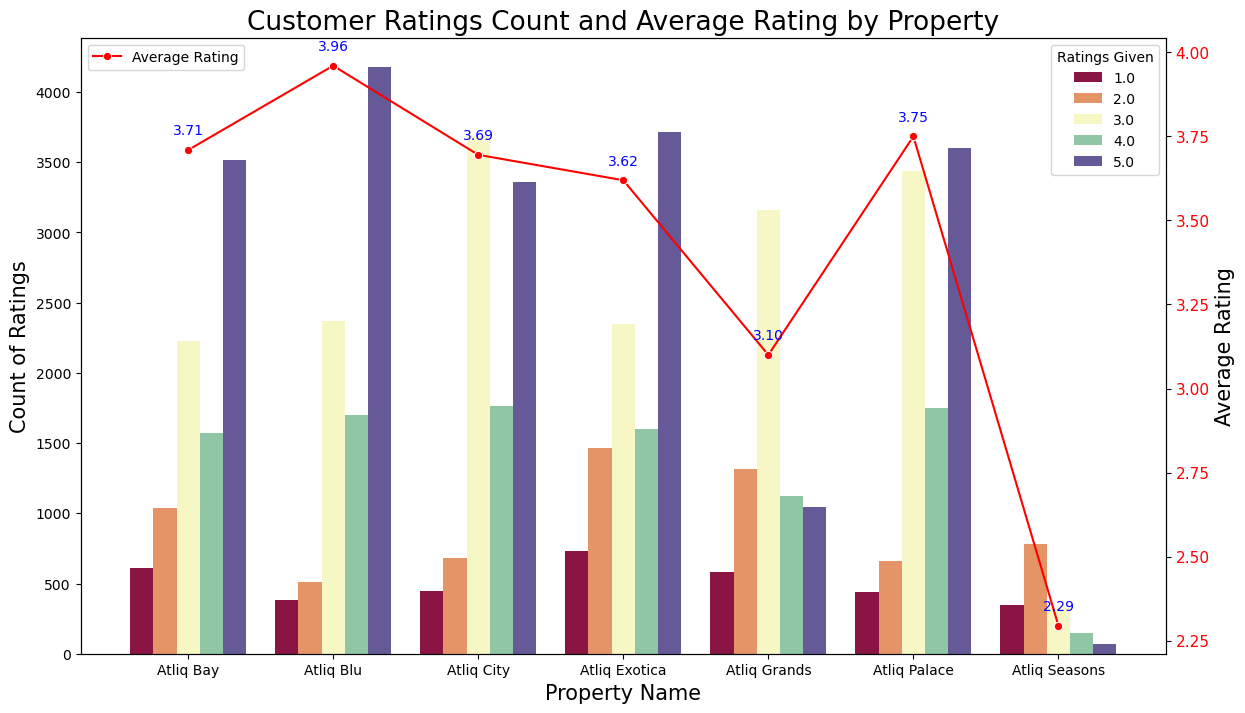

In [300]:
# total counts of each rating for each property
rating_cnt_property  = df[df['ratings_given'].notna()].groupby(['property_name','ratings_given'])['booking_id'].count()
rating_cnt_property = rating_cnt_property.reset_index()
rating_cnt_property.rename(columns={'booking_id': 'counts'}, inplace=True)

# avg ratings property wise
avg_rating_property = df[df['ratings_given'].notna()].groupby('property_name')['ratings_given'].mean().sort_values()
avg_rating_property = avg_rating_property.reset_index()

#--------------------------------------------------Let's plot bar

plt.figure(figsize=(14,8))

# bar plot for rating counts
sns.barplot(data=rating_cnt_property, x='property_name', y='counts',hue='ratings_given', palette='Spectral' )
plt.ylabel("Count of Ratings", fontsize=15)
plt.xlabel("Property Name",fontsize=15)
plt.title("Customer Ratings Count and Average Rating by Property",fontsize=19)

# Add legend for the bar plot
plt.legend(title='Ratings Given', loc='upper right')

#------------------------------------------------------ Next plot with secondary y axis

# Create a secondary y-axis for the line plot
ax2 = plt.gca().twinx()

# Line plot for average ratings
line = sns.lineplot(data=avg_rating_property, x='property_name', y='ratings_given', color='r', marker='o', ax=ax2, label='Average Rating')

# Annotate the average ratings on the line markers
for x, y in zip(avg_rating_property['property_name'], avg_rating_property['ratings_given']):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,11), ha='center', color='b')


ax2.set_ylabel("Average Rating",fontsize=15)
ax2.tick_params(axis='y', labelcolor='r',labelsize=11)


# Add legend for the line plot
ax2.legend(loc='upper left')

plt.show()


## 11. Customer Ratings Analysis (Platform wise)

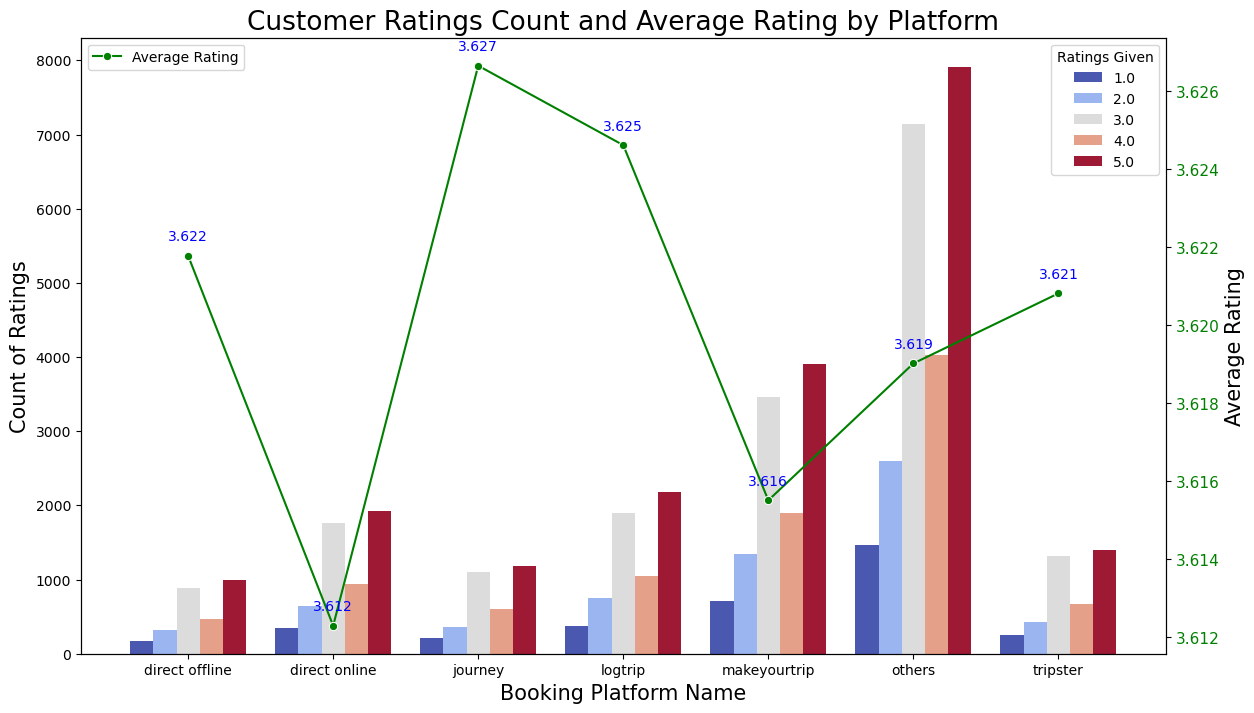

In [301]:
# total counts of each rating for each  platform
rating_cnt_platform = df[df['ratings_given'].notna()].groupby(['booking_platform','ratings_given'])['booking_id'].count()
rating_cnt_platform = rating_cnt_platform.reset_index()
rating_cnt_platform.rename(columns={'booking_id': 'counts'}, inplace=True)
rating_cnt_platform

# avg ratings platform wise
avg_rating_platform = df[df['ratings_given'].notna()].groupby('booking_platform')['ratings_given'].mean().sort_values()
avg_rating_platform = avg_rating_platform.reset_index()
avg_rating_platform

#--------------------------------------------------Let's plot

plt.figure(figsize=(14,8))

# bar plot for rating counts
sns.barplot(data=rating_cnt_platform, x='booking_platform', y='counts',hue='ratings_given', palette='coolwarm' )
plt.ylabel("Count of Ratings", fontsize=15)
plt.xlabel("Booking Platform Name",fontsize=15)
plt.title("Customer Ratings Count and Average Rating by Platform",fontsize=19)

# Add legend for the bar plot
plt.legend(title='Ratings Given', loc='upper right')

#------------------------------------------------------ Next plot with secondary y axis

# Create a secondary y-axis for the line plot
ax2 = plt.gca().twinx()

# Line plot for average ratings
line = sns.lineplot(data=avg_rating_platform, x='booking_platform', y='ratings_given', color='g', marker='o', ax=ax2, label='Average Rating')

# Annotate the average ratings on the line markers
for x, y in zip(avg_rating_platform['booking_platform'], avg_rating_platform['ratings_given']):
    ax2.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,11), ha='center', color='b')


ax2.set_ylabel("Average Rating",fontsize=15)
ax2.tick_params(axis='y', labelcolor='g',labelsize=11)


# Add legend for the line plot
ax2.legend(loc='upper left')

plt.show()



/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/344691348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_room ,x='room_category', y='avg_ratings_given', palette='viridis')


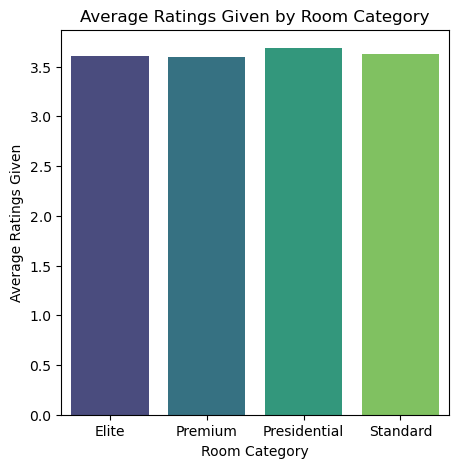

In [302]:
avg_rating_room = df[df['ratings_given'].notna()].groupby(["room_category"])['ratings_given'].mean()
avg_rating_room  = avg_rating_room .reset_index()
avg_rating_room.rename(columns={'ratings_given': 'avg_ratings_given'}, inplace=True)

plt.figure(figsize=(5,5))
sns.barplot(data=avg_rating_room ,x='room_category', y='avg_ratings_given', palette='viridis')
plt.xlabel("Room Category")
plt.ylabel("Average Ratings Given")
plt.title("Average Ratings Given by Room Category")
plt.show()

# Week on Week Growth Analysis

## 1. Weekly % Occupancy and Average Ratings

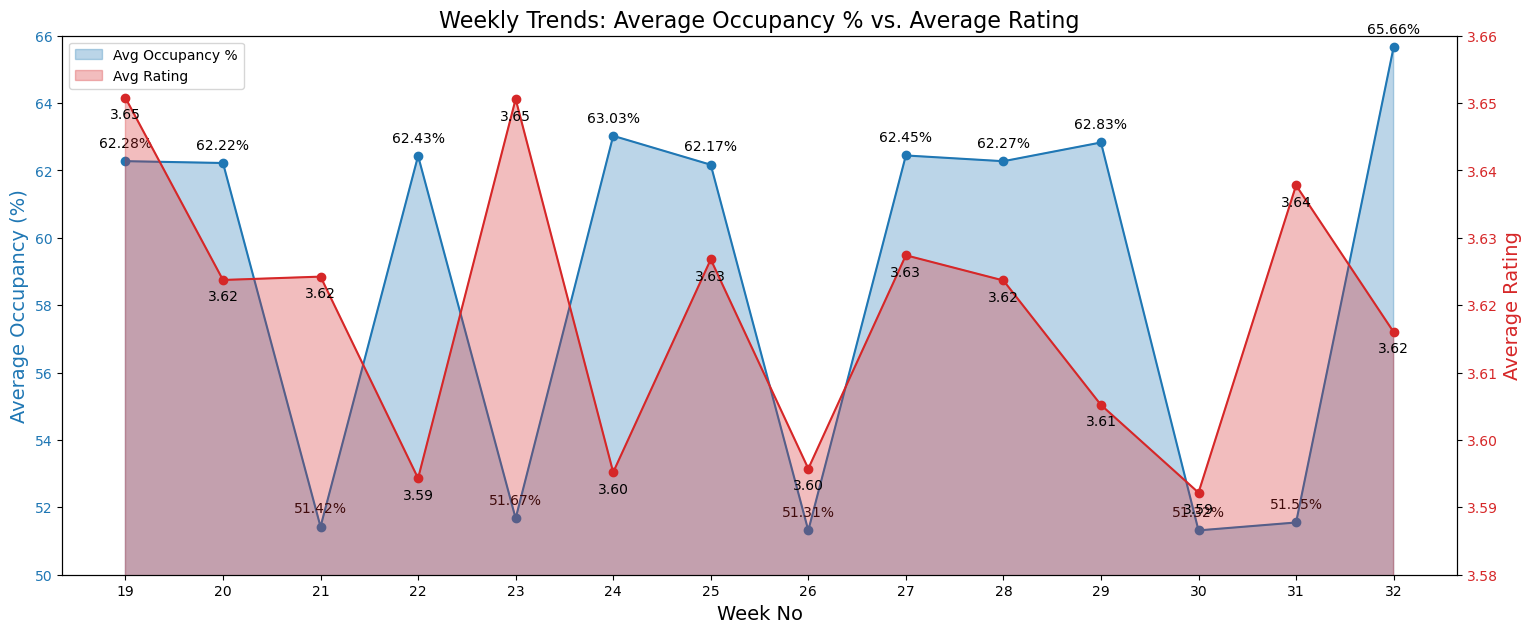

In [305]:
# Week vs Avg Rating vs Occupancy
W_occ = KPI.groupby('week no')['percent_occ'].mean()
W_rating = df[df['ratings_given'].notna()].groupby('week no')['ratings_given'].mean()

fig, ax1 = plt.subplots(figsize=(18, 7))

# Plot occupancy percentage as an area plot with low-medium alpha
ax1.fill_between(W_occ.index, W_occ.values, color='tab:blue', alpha=0.3, label='Avg Occupancy %')
ax1.plot(W_occ.index, W_occ.values, color='tab:blue', marker='o') # Keep the line for clarity
ax1.set_xlabel('Week No', fontsize=14)
ax1.set_ylabel('Average Occupancy (%)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylim(50, 66) # Set left y-axis scale

# Create a secondary y-axis for average rating
ax2 = ax1.twinx()
# Plot average rating as an area plot with low-medium alpha
ax2.fill_between(W_rating.index, W_rating.values, color='tab:red', alpha=0.3, label='Avg Rating')
ax2.plot(W_rating.index, W_rating.values, color='tab:red', marker='o') # Keep the line for clarity
ax2.set_ylabel('Average Rating', color='tab:red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(3.58, 3.66) # Set right y-axis scale

# Add annotations
for x, y in zip(W_occ.index, W_occ.values):
    ax1.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='black')
for x, y in zip(W_rating.index, W_rating.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, -15), ha='center', color='black')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Weekly Trends: Average Occupancy % vs. Average Rating', fontsize=16)

plt.xticks(range(19,33))
plt.show()


## 2. Group Data Week-Wise for ADR and RevPAR

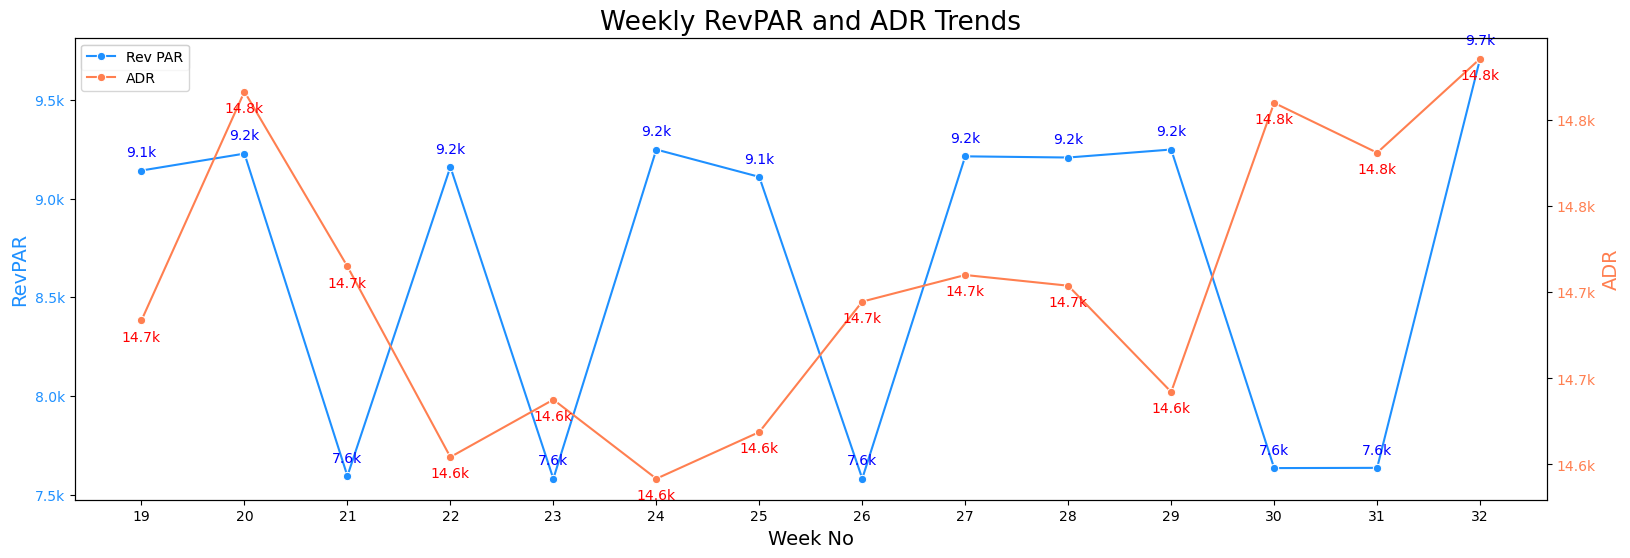

In [306]:
# week vs ADR vs RevPAR
week_ADR_RevPAR = KPI.groupby('week no').agg({'ADR':'mean','RevPAR':'mean'}).reset_index()

import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(19, 6))
# Plot RevPAR on primary y-axis
sns.lineplot(data=week_ADR_RevPAR, x='week no', y='RevPAR', ax=ax1, label='Rev PAR', color='dodgerblue', marker='o') # Added marker
ax1.set_xlabel('Week No',fontsize=14)
ax1.set_ylabel('RevPAR', color='dodgerblue',fontsize=14)
ax1.tick_params(axis='y', labelcolor='dodgerblue')


# Create a secondary y-axis for ADR
ax2 = ax1.twinx()
sns.lineplot(data=week_ADR_RevPAR, x='week no', y='ADR', ax=ax2, label='ADR', color='coral', marker='o') # Added marker
ax2.set_ylabel('ADR', color='coral', fontsize=14)
ax2.tick_params(axis='y', labelcolor='coral')

# Format y-axis labels in K format
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1000:.1f}k')
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# Add annotations for each point with K format
for x, y in zip(week_ADR_RevPAR['week no'], week_ADR_RevPAR['RevPAR']):
    ax1.annotate(f'{y/1000:.1f}k', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for x, y in zip(week_ADR_RevPAR['week no'], week_ADR_RevPAR['ADR']):
    ax2.annotate(f'{y/1000:.1f}k', (x, y), textcoords="offset points", xytext=(0,-15), ha='center', color='red')


# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Weekly RevPAR and ADR Trends',fontsize=19)
plt.xticks(range(19,33))
plt.show()


 ## 3 Revenue Split by Time Period (weekly)

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_62183/1281809454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x=weekly_rev.index, y=weekly_rev.values, palette='Blues' )


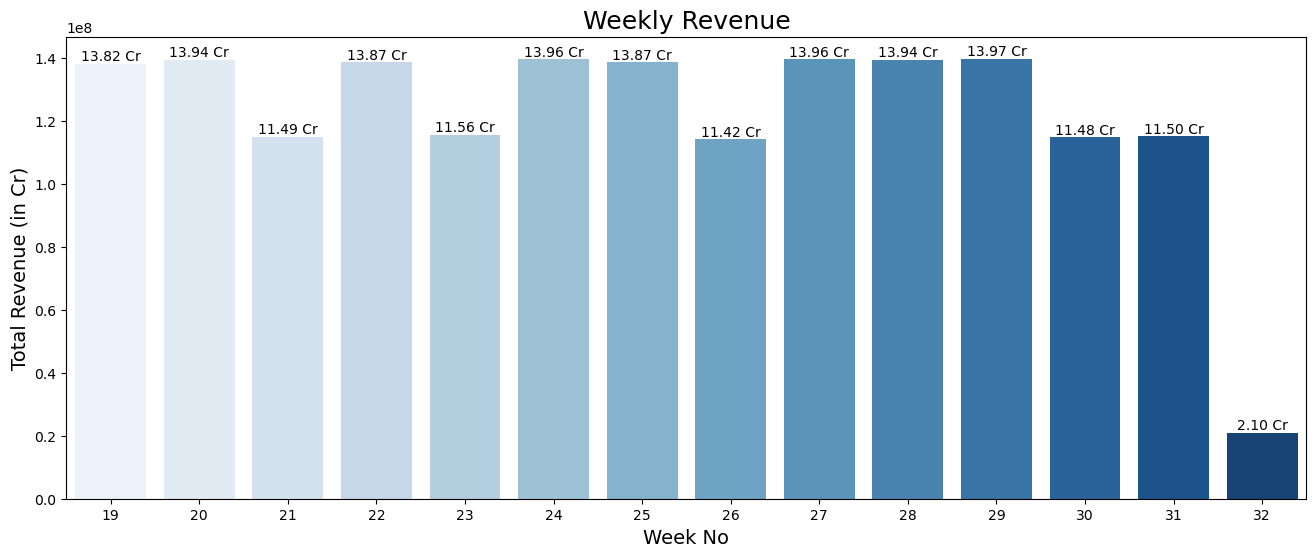

In [309]:
weekly_rev = df.groupby('week no')['revenue_realized'].sum()

plt.figure(figsize=(16,6))

ax = sns.barplot( x=weekly_rev.index, y=weekly_rev.values, palette='Blues' )

for con in ax.containers:
  labels = [f'{v.get_height()/10000000:.2f} Cr' for v in con]
  ax.bar_label(con, labels=labels, label_type='edge', fontsize=10)

plt.xlabel("Week No", fontsize=14)
plt.ylabel("Total Revenue (in Cr)", fontsize=14)
plt.title("Weekly Revenue", fontsize=18)

plt.show()